# COVID-19 Time Series

Muriel, Gabe, JD

Final model: serimax model for national and state cases

In [1]:
import pandas as pd
import pmdarima as pm
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import pyplot
from sklearn import metrics
import pandas as pd
import plotly.express as px
import numpy as np
import matplotlib.pyplot as plt
import json
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import requests
import folium
from sklearn import preprocessing
import numpy as np
from statsmodels.tsa.stattools import adfuller
from sklearn.preprocessing import StandardScaler
from scipy.stats import norm
import statsmodels.api as sm
from sklearn import metrics
%matplotlib inline

In [2]:
#Transforming the data to be time series interperatible
con = pd.read_csv('time_series_covid19_confirmed_US.csv')
pro =pd.read_csv('time_series_covid19_deaths_US.csv')
US_confirmed = pd.melt(con, id_vars=['UID', 'iso2', 'iso3', 'code3', 'FIPS', 'Admin2', 'Province_State',
       'Country_Region', 'Lat', 'Long_', 'Combined_Key'])
US_confirmed['variable'] = pd.to_datetime(US_confirmed['variable'], infer_datetime_format=True)
cases_confirmed = pd.melt(con, id_vars=['UID', 'iso2', 'iso3', 'code3', 'FIPS', 'Admin2', 'Province_State',
       'Country_Region', 'Lat', 'Long_', 'Combined_Key'])
cases_confirmed['variable'] = pd.to_datetime(US_confirmed['variable'], infer_datetime_format=True)
US_deaths = pd.melt(pro, id_vars=['UID', 'iso2', 'iso3', 'code3', 'FIPS', 'Admin2', 'Province_State',
       'Country_Region', 'Lat', 'Long_', 'Combined_Key','Population'])
US_deaths['variable'] = pd.to_datetime(US_deaths['variable'], infer_datetime_format=True)
cases_deaths = pd.melt(pro, id_vars=['UID', 'iso2', 'iso3', 'code3', 'FIPS', 'Admin2', 'Province_State',
       'Country_Region', 'Lat', 'Long_', 'Combined_Key','Population'])
cases_deaths['variable'] = pd.to_datetime(US_deaths['variable'], infer_datetime_format=True)
US_confirmed['variable'] = pd.to_datetime(US_confirmed['variable'], format='%y-%m-%d')
US_deaths['variable'] = pd.to_datetime(US_deaths['variable'], format='%y-%m-%d')

In [3]:
#Creating a dataframe with only values we need and reseting the index to a daily bases
def setting_index(x):
    x.drop(['UID', 'iso2', 'iso3', 'code3', 'FIPS', 'Admin2', 'Province_State',
       'Country_Region', 'Lat', 'Long_', 'Combined_Key', 'Population'],inplace=True,axis=1)
    x.set_index(['variable'],inplace=True)
    return pd.DataFrame(x.resample('D').sum())
def sett_index(x):
    x.drop(['UID', 'iso2', 'iso3', 'code3', 'FIPS', 'Admin2', 'Province_State',
       'Country_Region', 'Lat', 'Long_', 'Combined_Key'],inplace=True,axis=1)
    x.set_index(['variable'],inplace=True)
    return pd.DataFrame(x.resample('D').sum())

In [4]:
#Evaluation Metric
def mean_aboslute_error(y_train,y_train_pred):
    return metrics.mean_absolute_error(y_train, y_train_pred)
def mean_squared_error(y_train,y_train_pred):
    return metrics.mean_squared_error(y_train, y_train_pred)

## National confirmed cases dataset

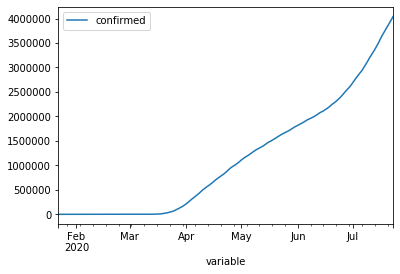

In [5]:
#aggregating to a national leve1
national_confirmed =sett_index(cases_confirmed)
national_confirmed.rename(columns={'value':'confirmed'}, inplace=True)
national_confirmed.plot()

## Confirmed cases

In [6]:
#Applying sett_index to every individual state
American_Samoa=sett_index(US_confirmed[US_confirmed['Province_State']=='American Samoa'])
Guam=sett_index(US_confirmed[US_confirmed['Province_State']=='Guam'])
Northern_Mariana_Islands=sett_index(US_confirmed[US_confirmed['Province_State']=='Northern Mariana Islands'])
Puerto_Rico=sett_index(US_confirmed[US_confirmed['Province_State']=='Puerto Rico'])
Virgin_Islands=sett_index(US_confirmed[US_confirmed['Province_State']=='Virgin Islands'])
Alabama=sett_index(US_confirmed[US_confirmed['Province_State']=='Alabama'])
Alaska=sett_index(US_confirmed[US_confirmed['Province_State']=='Alaska'])
Arizona=sett_index(US_confirmed[US_confirmed['Province_State']=='Arizona'])
Arkansas=sett_index(US_confirmed[US_confirmed['Province_State']=='Arkansas'])
California=sett_index(US_confirmed[US_confirmed['Province_State']=='California'])
Colorado=sett_index(US_confirmed[US_confirmed['Province_State']=='Colorado'])
Connecticut=sett_index(US_confirmed[US_confirmed['Province_State']=='Connecticut'])
Delaware=sett_index(US_confirmed[US_confirmed['Province_State']=='Delaware'])
District_of_Columbia=sett_index(US_confirmed[US_confirmed['Province_State']=='District of Columbia'])
Florida=sett_index(US_confirmed[US_confirmed['Province_State']=='Florida'])
Georgia=sett_index(US_confirmed[US_confirmed['Province_State']=='Georgia'])
Hawaii=sett_index(US_confirmed[US_confirmed['Province_State']=='Hawaii'])
Idaho=sett_index(US_confirmed[US_confirmed['Province_State']=='Idaho'])
Illinois=sett_index(US_confirmed[US_confirmed['Province_State']=='Illinois'])
Indiana=sett_index(US_confirmed[US_confirmed['Province_State']=='Indiana'])
Iowa=sett_index(US_confirmed[US_confirmed['Province_State']=='Iowa'])
Kansas=sett_index(US_confirmed[US_confirmed['Province_State']=='Kansas'])
Kentucky=sett_index(US_confirmed[US_confirmed['Province_State']=='Kentucky'])
Louisiana=sett_index(US_confirmed[US_confirmed['Province_State']=='Louisiana'])
Maine=sett_index(US_confirmed[US_confirmed['Province_State']=='Maine'])
Maryland=sett_index(US_confirmed[US_confirmed['Province_State']=='Maryland'])
Massachusetts=sett_index(US_confirmed[US_confirmed['Province_State']=='Massachusetts'])
Michigan=sett_index(US_confirmed[US_confirmed['Province_State']=='Michigan'])
Minnesota=sett_index(US_confirmed[US_confirmed['Province_State']=='Minnesota'])
Mississippi=sett_index(US_confirmed[US_confirmed['Province_State']=='Mississippi'])
Missouri=sett_index(US_confirmed[US_confirmed['Province_State']=='Missouri'])
Montana=sett_index(US_confirmed[US_confirmed['Province_State']=='Montana'])
Nebraska=sett_index(US_confirmed[US_confirmed['Province_State']=='Nebraska'])
Nevada=sett_index(US_confirmed[US_confirmed['Province_State']=='Nevada'])
New_Hampshire=sett_index(US_confirmed[US_confirmed['Province_State']=='New Hampshire'])
New_Jersey=sett_index(US_confirmed[US_confirmed['Province_State']=='New Jersey'])
New_Mexico=sett_index(US_confirmed[US_confirmed['Province_State']=='New Mexico'])
New_York=sett_index(US_confirmed[US_confirmed['Province_State']=='New York'])
North_Carolina=sett_index(US_confirmed[US_confirmed['Province_State']=='North Carolina'])
North_Dakota=sett_index(US_confirmed[US_confirmed['Province_State']=='North Dakota'])
Ohio=sett_index(US_confirmed[US_confirmed['Province_State']=='Ohio'])
Oklahoma=sett_index(US_confirmed[US_confirmed['Province_State']=='Oklahoma'])
Oregon=sett_index(US_confirmed[US_confirmed['Province_State']=='Oregon'])
Pennsylvania=sett_index(US_confirmed[US_confirmed['Province_State']=='Pennsylvania'])
Rhode_Island=sett_index(US_confirmed[US_confirmed['Province_State']=='Rhode Island'])
South_Carolina=sett_index(US_confirmed[US_confirmed['Province_State']=='South Carolina'])
South_Dakota=sett_index(US_confirmed[US_confirmed['Province_State']=='South Dakota'])
Tennessee=sett_index(US_confirmed[US_confirmed['Province_State']=='Tennessee'])
Texas=sett_index(US_confirmed[US_confirmed['Province_State']=='Texas'])
Utah=sett_index(US_confirmed[US_confirmed['Province_State']=='Utah'])
Vermont=sett_index(US_confirmed[US_confirmed['Province_State']=='Vermont'])
Virginia=sett_index(US_confirmed[US_confirmed['Province_State']=='Virginia'])
Washington=sett_index(US_confirmed[US_confirmed['Province_State']=='Washington'])
West_Virginia=sett_index(US_confirmed[US_confirmed['Province_State']=='West Virginia'])
Wisconsin=sett_index(US_confirmed[US_confirmed['Province_State']=='Wisconsin'])
Wyoming=sett_index(US_confirmed[US_confirmed['Province_State']=='Wyoming'])
Diamond_Princess=sett_index(US_confirmed[US_confirmed['Province_State']=='Diamond Princess'])
Grand_Princess=sett_index(US_confirmed[US_confirmed['Province_State']=='Grand Princess'])

/Users/jdanielkim123/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/pandas/core/frame.py:4102: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [7]:
#cleaning state data
US_deaths_states = [American_Samoa, Guam, Northern_Mariana_Islands,Puerto_Rico, Virgin_Islands, Alabama, Alaska, Arizona,Arkansas, California, Colorado, Connecticut, Delaware,District_of_Columbia, Florida, Georgia, Hawaii, Idaho,Illinois, Indiana, Iowa, Kansas, Kentucky, Louisiana,Maine, Maryland, Massachusetts, Michigan, Minnesota,Mississippi, Missouri, Montana, Nebraska, Nevada,New_Hampshire, New_Jersey, New_Mexico, New_York,North_Carolina, North_Dakota, Ohio, Oklahoma, Oregon,Pennsylvania, Rhode_Island, South_Carolina, South_Dakota,Tennessee, Texas, Utah, Vermont, Virginia, Washington,West_Virginia, Wisconsin, Wyoming, Diamond_Princess,Grand_Princess]

In [8]:
US_deaths_states_string = ['American_Samoa', 'Guam', 'Northern_Mariana_Islands','Puerto_Rico', 'Virgin_Islands', 'Alabama', 'Alaska', 'Arizona','Arkansas', 'California', 'Colorado', 'Connecticut', 'Delaware','District_of_Columbia', 'Florida', 'Georgia', 'Hawaii', 'Idaho','Illinois', 'Indiana', 'Iowa', 'Kansas', 'Kentucky', 'Louisiana','Maine', 'Maryland', 'Massachusetts', 'Michigan', 'Minnesota','Mississippi', 'Missouri', 'Montana', 'Nebraska', 'Nevada','New_Hampshire', 'New_Jersey', 'New_Mexico', 'New_York','North_Carolina', 'North_Dakota', 'Ohio', 'Oklahoma', 'Oregon','Pennsylvania', 'Rhode_Island', 'South_Carolina', 'South_Dakota','Tennessee', 'Texas', 'Utah', 'Vermont', 'Virginia', 'Washington','West_Virginia', 'Wisconsin', 'Wyoming', 'Diamond_Princess','Grand_Princess']

In [9]:
American_Samoa.rename(columns={'value':US_deaths_states_string[0]},inplace=True)
Guam.rename(columns={'value':US_deaths_states_string[1]},inplace=True)
Northern_Mariana_Islands.rename(columns={'value':US_deaths_states_string[2]},inplace=True)
Puerto_Rico.rename(columns={'value':US_deaths_states_string[3]},inplace=True)
Virgin_Islands.rename(columns={'value':US_deaths_states_string[4]},inplace=True)
Alabama.rename(columns={'value':US_deaths_states_string[5]},inplace=True)
Alaska.rename(columns={'value':US_deaths_states_string[6]},inplace=True)
Arizona.rename(columns={'value':US_deaths_states_string[7]},inplace=True)
Arkansas.rename(columns={'value':US_deaths_states_string[8]},inplace=True)
California.rename(columns={'value':US_deaths_states_string[9]},inplace=True)
Colorado.rename(columns={'value':US_deaths_states_string[10]},inplace=True)
Connecticut.rename(columns={'value':US_deaths_states_string[11]},inplace=True)
Delaware.rename(columns={'value':US_deaths_states_string[12]},inplace=True)
District_of_Columbia.rename(columns={'value':US_deaths_states_string[13]},inplace=True)
Florida.rename(columns={'value':US_deaths_states_string[14]},inplace=True)
Georgia.rename(columns={'value':US_deaths_states_string[15]},inplace=True)
Hawaii.rename(columns={'value':US_deaths_states_string[16]},inplace=True)
Idaho.rename(columns={'value':US_deaths_states_string[17]},inplace=True)
Illinois.rename(columns={'value':US_deaths_states_string[18]},inplace=True)
Indiana.rename(columns={'value':US_deaths_states_string[19]},inplace=True)
Iowa.rename(columns={'value':US_deaths_states_string[20]},inplace=True)
Kansas.rename(columns={'value':US_deaths_states_string[21]},inplace=True)
Kentucky.rename(columns={'value':US_deaths_states_string[22]},inplace=True)
Louisiana.rename(columns={'value':US_deaths_states_string[23]},inplace=True)
Maine.rename(columns={'value':US_deaths_states_string[24]},inplace=True)
Maryland.rename(columns={'value':US_deaths_states_string[25]},inplace=True)
Massachusetts.rename(columns={'value':US_deaths_states_string[26]},inplace=True)
Michigan.rename(columns={'value':US_deaths_states_string[27]},inplace=True)
Minnesota.rename(columns={'value':US_deaths_states_string[28]},inplace=True)
Mississippi.rename(columns={'value':US_deaths_states_string[29]},inplace=True)
Missouri.rename(columns={'value':US_deaths_states_string[30]},inplace=True)
Montana.rename(columns={'value':US_deaths_states_string[31]},inplace=True)
Nebraska.rename(columns={'value':US_deaths_states_string[32]},inplace=True)
Nevada.rename(columns={'value':US_deaths_states_string[33]},inplace=True)
New_Hampshire.rename(columns={'value':US_deaths_states_string[34]},inplace=True)
New_Jersey.rename(columns={'value':US_deaths_states_string[35]},inplace=True)
New_Mexico.rename(columns={'value':US_deaths_states_string[36]},inplace=True)
New_York.rename(columns={'value':US_deaths_states_string[37]},inplace=True)
North_Carolina.rename(columns={'value':US_deaths_states_string[38]},inplace=True)
North_Dakota.rename(columns={'value':US_deaths_states_string[39]},inplace=True)
Ohio.rename(columns={'value':US_deaths_states_string[40]},inplace=True)
Oklahoma.rename(columns={'value':US_deaths_states_string[41]},inplace=True)
Oregon.rename(columns={'value':US_deaths_states_string[42]},inplace=True)
Pennsylvania.rename(columns={'value':US_deaths_states_string[43]},inplace=True)
Rhode_Island.rename(columns={'value':US_deaths_states_string[44]},inplace=True)
South_Carolina.rename(columns={'value':US_deaths_states_string[45]},inplace=True)
South_Dakota.rename(columns={'value':US_deaths_states_string[46]},inplace=True)
Tennessee.rename(columns={'value':US_deaths_states_string[47]},inplace=True)
Texas.rename(columns={'value':US_deaths_states_string[48]},inplace=True)
Utah.rename(columns={'value':US_deaths_states_string[49]},inplace=True)
Vermont.rename(columns={'value':US_deaths_states_string[50]},inplace=True)
Virginia.rename(columns={'value':US_deaths_states_string[51]},inplace=True)
Washington.rename(columns={'value':US_deaths_states_string[52]},inplace=True)
West_Virginia.rename(columns={'value':US_deaths_states_string[53]},inplace=True)
Wisconsin.rename(columns={'value':US_deaths_states_string[54]},inplace=True)
Wyoming.rename(columns={'value':US_deaths_states_string[55]},inplace=True)
Diamond_Princess.rename(columns={'value':US_deaths_states_string[56]},inplace=True)
Grand_Princess.rename(columns={'value':US_deaths_states_string[57]},inplace=True)

In [10]:
#Concat to show general distributions 
confirmed_concat = pd.concat([American_Samoa, Guam, Northern_Mariana_Islands,
       Puerto_Rico, Virgin_Islands, Alabama, Alaska, Arizona,
       Arkansas, California, Colorado, Connecticut, Delaware,
       District_of_Columbia, Florida, Georgia, Hawaii, Idaho,
       Illinois, Indiana, Iowa, Kansas, Kentucky, Louisiana,
       Maine, Maryland, Massachusetts, Michigan, Minnesota,
       Mississippi, Missouri, Montana, Nebraska, Nevada,
       New_Hampshire, New_Jersey, New_Mexico, New_York,
       North_Carolina, North_Dakota, Ohio, Oklahoma, Oregon,
       Pennsylvania, Rhode_Island, South_Carolina, South_Dakota,
       Tennessee, Texas, Utah, Vermont, Virginia, Washington,
       West_Virginia, Wisconsin, Wyoming, Diamond_Princess,
       Grand_Princess], axis=1)

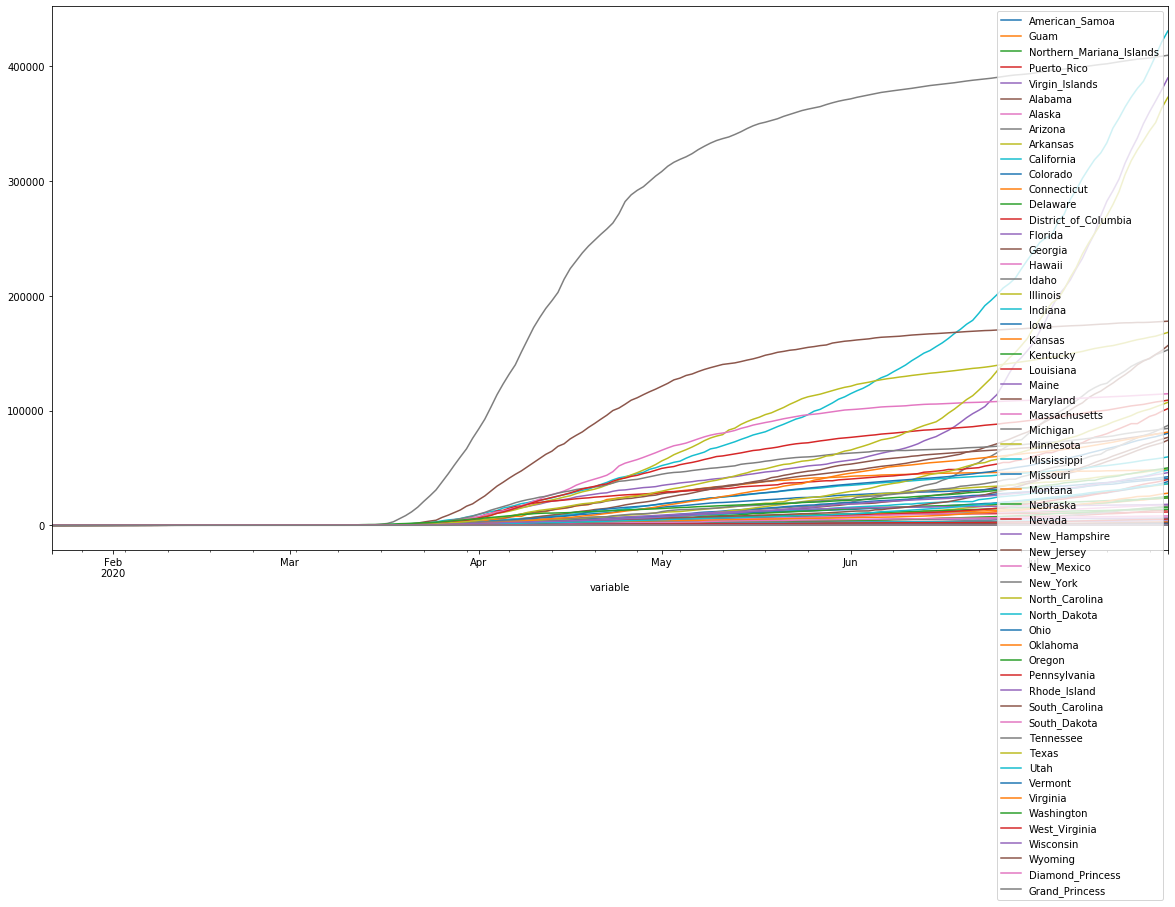

In [11]:
confirmed_concat.plot(figsize=(20,10))

##  Testing Confirmed Total Arima National

In [12]:
#Total national amount of deaths
confirmed_total = pd.DataFrame(national_confirmed)

### Dickey fuller test for stationary

In [13]:
from statsmodels.tsa.stattools import adfuller
test = adfuller(confirmed_total.confirmed)
dfoutput = pd.Series(test[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
print(dfoutput)

Test Statistic                   2.514222
p-value                          0.999054
#Lags Used                      10.000000
Number of Observations Used    173.000000
dtype: float64


In [14]:
from statsmodels.tsa.stattools import adfuller
test = adfuller(confirmed_total.confirmed.diff()[1:-1])
dfoutput = pd.Series(test[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
print(dfoutput)

Test Statistic                  -0.686540
p-value                          0.850205
#Lags Used                      13.000000
Number of Observations Used    168.000000
dtype: float64


In [15]:
from statsmodels.tsa.stattools import adfuller
test = adfuller(confirmed_total.confirmed.diff().diff()[2:-2])
dfoutput = pd.Series(test[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
print(dfoutput)

Test Statistic                  -2.246082
p-value                          0.189947
#Lags Used                      14.000000
Number of Observations Used    165.000000
dtype: float64


In [16]:
test = adfuller(confirmed_total.confirmed.diff().diff().diff()[3:-3])
dfoutput = pd.Series(test[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
print(dfoutput)

Test Statistic                  -3.516496
p-value                          0.007573
#Lags Used                      14.000000
Number of Observations Used    163.000000
dtype: float64


After 3 differences, we realize that the dickey fuller test rejects the null 

In [17]:
#Testing and splitting
confirmed_total_diff= confirmed_total['2020-03-08':].diff().diff()
test_dates = '2020-07-09'
training_dates_start = '2020-03-08'
training_dates_end = '2020-07-08'
testing_set_values = confirmed_total_diff[test_dates:]
testing_set = confirmed_total_diff[test_dates:].drop('confirmed',axis=1)
training_set = confirmed_total_diff[training_dates_start:training_dates_end]
actual_training = confirmed_total[training_dates_start:training_dates_end]
actual_testing = confirmed_total[test_dates:]

In [18]:
#Reverse Difference
def finding_confirmed(training_set,forcast):
    pred_deaths = pd.DataFrame(forcast)
    pred_deaths.rename(columns={0:'confirmed'},inplace=True)
    x, x_diff = pred_deaths['confirmed'].iloc[0], pred_deaths['confirmed'].iloc[1:]
    pred_deaths['C'] = np.r_[x, x_diff].cumsum().astype(int)
    x, x_diff = pred_deaths['C'].iloc[0], pred_deaths['C'].iloc[1:]
    pred_deaths['D'] = np.r_[x, x_diff].cumsum().astype(int)
    return np.sqrt(metrics.mean_squared_error(training_set, pred_deaths['D']))

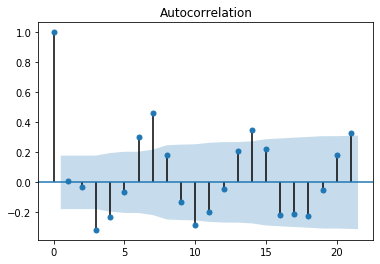

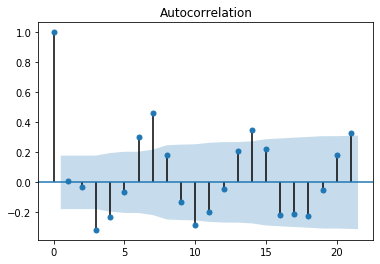

In [19]:
from statsmodels.graphics.tsaplots import plot_acf
#plot autocorrelation for each lag (alpha is confidence interval)
plot_acf(training_set[2:], alpha=.05)

In [20]:
#Didn't end up using this model because we couldn't diffference 3 times
from statsmodels.tsa.arima_model import ARIMA
model = ARIMA(actual_training, order=(6,2,1))
model_fit = model.fit()
print(model_fit.summary())

                             ARIMA Model Results                              
Dep. Variable:           D2.confirmed   No. Observations:                  121
Model:                 ARIMA(6, 2, 1)   Log Likelihood               -1124.033
Method:                       css-mle   S.D. of innovations           2588.260
Date:                Thu, 30 Jul 2020   AIC                           2266.067
Time:                        15:25:57   BIC                           2291.229
Sample:                    03-10-2020   HQIC                          2276.286
                         - 07-08-2020                                         
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                526.8536    382.652      1.377      0.169    -223.131    1276.838
ar.L1.D2.confirmed     0.4476      0.094      4.750      0.000       0.263       0.632
ar.L2.D2.confirmed  

In [21]:
#predicting on training
pred_confirmed = model_fit.predict()

In [22]:
#training RMSE
np.sqrt(metrics.mean_squared_error(pred_confirmed, training_set[2:]))

2590.0875684599846

In [23]:
pred_start_date = '2020-07-09'
pred_end_date ='2020-07-23'

In [24]:
#predict on testing
predict=model_fit.predict(start=pred_start_date, end=pred_end_date)

In [25]:
#testing RMSE
np.sqrt(metrics.mean_squared_error(predict, testing_set_values))

6100.40234121038

## Sarimax Confirmed National

In [26]:
#Three differences
confirmed_total_diff= confirmed_total['2020-03-10':].diff().diff().diff()
test_dates = '2020-07-10'
training_dates_start = '2020-03-10'
training_dates_end = '2020-07-08'
testing_set_values = confirmed_total_diff[test_dates:]
testing_set = confirmed_total_diff[test_dates:].drop('confirmed',axis=1)
training_set = confirmed_total_diff[training_dates_start:training_dates_end]
actual_training = confirmed_total[training_dates_start:training_dates_end]
actual_testing = confirmed_total[test_dates:]

In [27]:
#Fitting Sarimax model
mod = sm.tsa.statespace.SARIMAX(endog = actual_training['confirmed'], order=(6,3,1))
res = mod.fit(disp=False)
print(res.summary())

/Users/jdanielkim123/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/statespace/sarimax.py:963: UserWarning:

Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.



                               SARIMAX Results                                
Dep. Variable:              confirmed   No. Observations:                  121
Model:               SARIMAX(6, 3, 1)   Log Likelihood               -1090.268
Date:                Thu, 30 Jul 2020   AIC                           2196.535
Time:                        15:25:58   BIC                           2218.701
Sample:                    03-10-2020   HQIC                          2205.535
                         - 07-08-2020                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.8774      0.140     -6.280      0.000      -1.151      -0.604
ar.L2         -0.7201      0.141     -5.124      0.000      -0.996      -0.445
ar.L3         -0.8748      0.120     -7.304      0.0

In [28]:
# Model Evaluation - Training Set
pred_confirmed = res.predict()

In [29]:
#Training RMSE
np.sqrt(metrics.mean_squared_error(actual_training, pred_confirmed))

2415.9843880145336

In [30]:
predict_start_date = testing_set.index[0]
predict_end_date = testing_set.index[-1]

In [31]:
# Prediction - Testing Set
predict__confirmed_testing = res.predict(start=predict_start_date, end=predict_end_date)

In [32]:
#Testing RMSE
np.sqrt(metrics.mean_squared_error(actual_testing, predict__confirmed_testing))

15324.780863415199

In [33]:
#Mean Absolute error
mean_aboslute_error(actual_testing, predict__confirmed_testing)

14051.65035341986

In [34]:
#Mean Squared error
mean_squared_error(actual_testing, predict__confirmed_testing)

234848908.51169667

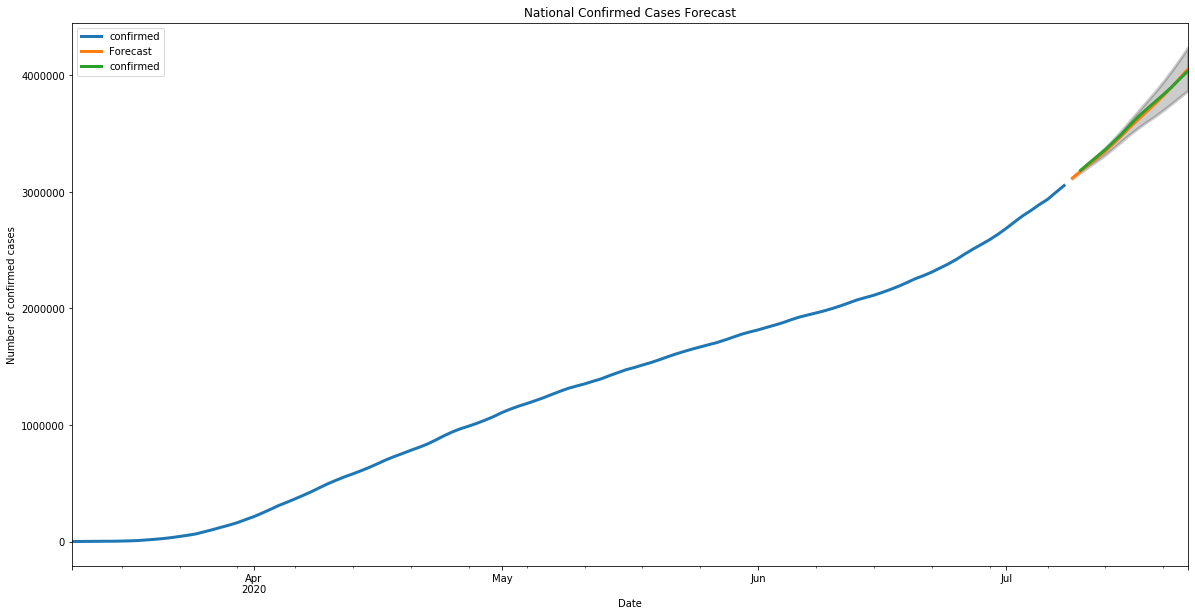

In [35]:
pred = res.get_prediction(start=pd.to_datetime('2020-07-09'),end=pd.to_datetime('2020-07-23'), dynamic=False)
pred_ci = pred.conf_int()
ax = actual_training.plot(label='Training',linewidth=3)
pred.predicted_mean.plot(ax=ax, label='Forecast', alpha=1, figsize=(20, 10),linewidth=3)
actual_testing.plot(ax=ax, label='Actual', alpha=1, figsize=(20, 10),linewidth=3)
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2,linewidth=3)
ax.set_xlabel('Date')
ax.set_ylabel('Number of confirmed cases')
ax.set_title('National Confirmed Cases Forecast')
plt.legend()
# plt.savefig('National_Confirmed_Cases_Forecast.png')
plt.show()

## Top 4 States Confirmed Cases

### California

In [36]:
#Three differences
test_dates = '2020-07-10'
training_dates_start = '2020-03-10'
training_dates_end = '2020-07-08'
actual_training = confirmed_concat['California'][training_dates_start:training_dates_end]
actual_testing = confirmed_concat['California'][test_dates:]

In [37]:
#Fitting Sarimax model
mod = sm.tsa.statespace.SARIMAX(endog = actual_training, order=(6,3,1))
res = mod.fit(disp=False)
print(res.summary())

/Users/jdanielkim123/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/statespace/sarimax.py:963: UserWarning:

Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.

/Users/jdanielkim123/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/statespace/sarimax.py:975: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.



                               SARIMAX Results                                
Dep. Variable:             California   No. Observations:                  121
Model:               SARIMAX(6, 3, 1)   Log Likelihood                -969.483
Date:                Thu, 30 Jul 2020   AIC                           1954.965
Time:                        15:25:58   BIC                           1977.131
Sample:                    03-10-2020   HQIC                          1963.965
                         - 07-08-2020                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.2634      0.075    -16.844      0.000      -1.410      -1.116
ar.L2         -0.9886      0.113     -8.783      0.000      -1.209      -0.768
ar.L3         -0.9917      0.130     -7.630      0.0

/Users/jdanielkim123/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/base/model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



In [38]:
pred_confirmed = res.predict()

In [39]:
#Training RMSE
np.sqrt(metrics.mean_squared_error(actual_training, pred_confirmed))

853.5801968444441

In [40]:
predict_start_date = testing_set.index[0]
predict_end_date = testing_set.index[-1]
predict__confirmed_testing = res.predict(start=predict_start_date, end=predict_end_date)

In [41]:
#Testing RMSE
np.sqrt(metrics.mean_squared_error(actual_testing, predict__confirmed_testing))

6283.901755507653

In [42]:
mean_aboslute_error(actual_testing, predict__confirmed_testing)

4912.720516663103

In [43]:
mean_squared_error(actual_testing, predict__confirmed_testing)

39487421.272872165

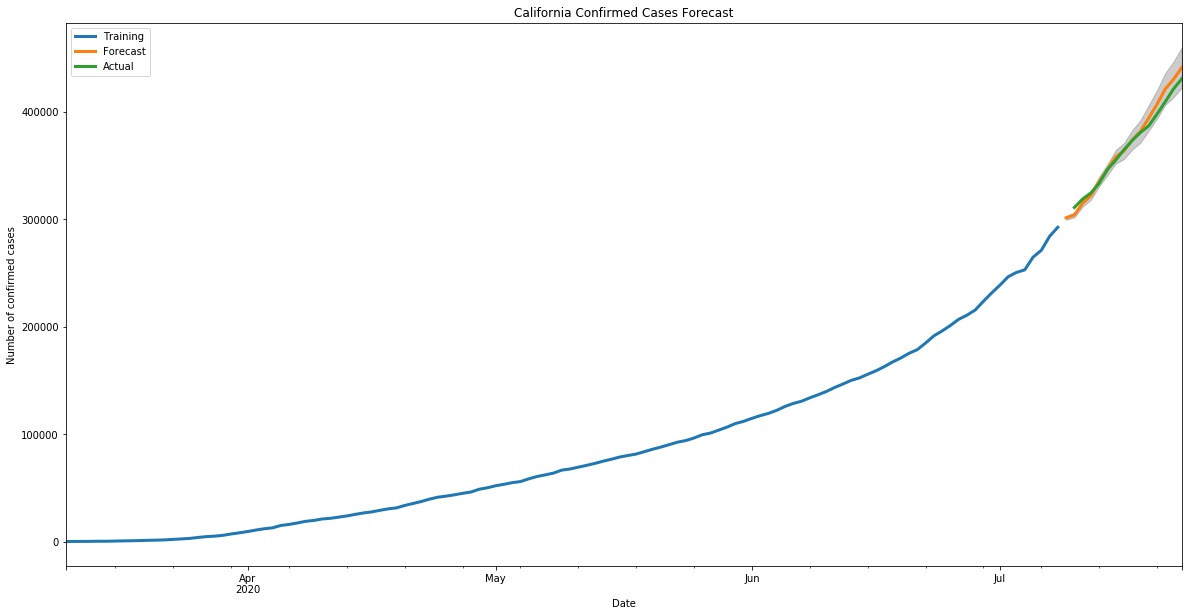

In [44]:

pred = res.get_prediction(start=pd.to_datetime('2020-07-09'),end=pd.to_datetime('2020-07-23'), dynamic=False)
pred_ci = pred.conf_int()
ax = actual_training.plot(label='Training',linewidth=3)
pred.predicted_mean.plot(ax=ax, label='Forecast', alpha=1, figsize=(20, 10),linewidth=3)
actual_testing.plot(ax=ax, label='Actual', alpha=1, figsize=(20, 10),linewidth=3)
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)
ax.set_xlabel('Date')
ax.set_ylabel('Number of confirmed cases')
ax.set_title('California Confirmed Cases Forecast')
# plt.savefig('California_Confirmed_Cases_Forecast.png')

plt.legend()
plt.show()

### New York

In [45]:
#Three differences
test_dates = '2020-07-10'
training_dates_start = '2020-03-10'
training_dates_end = '2020-07-08'
actual_training = confirmed_concat['New_York'][training_dates_start:training_dates_end]
actual_testing = confirmed_concat['New_York'][test_dates:]
#Fitting Sarimax model
mod = sm.tsa.statespace.SARIMAX(endog = actual_training, order=(6,3,1))
res = mod.fit(disp=False)
print(res.summary())

/Users/jdanielkim123/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/statespace/sarimax.py:963: UserWarning:

Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.



                               SARIMAX Results                                
Dep. Variable:               New_York   No. Observations:                  121
Model:               SARIMAX(6, 3, 1)   Log Likelihood                -971.486
Date:                Thu, 30 Jul 2020   AIC                           1958.973
Time:                        15:25:59   BIC                           1981.138
Sample:                    03-10-2020   HQIC                          1967.972
                         - 07-08-2020                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.2687      0.060     -4.455      0.000      -0.387      -0.150
ar.L2         -0.5580      0.079     -7.025      0.000      -0.714      -0.402
ar.L3         -0.4533      0.090     -5.043      0.0

In [46]:
pred_confirmed = res.predict()

In [47]:
np.sqrt(metrics.mean_squared_error(actual_training, pred_confirmed))

892.8031124528214

In [48]:
predict_start_date = testing_set.index[0]
predict_end_date = testing_set.index[-1]
predict__confirmed_testing = res.predict(start=predict_start_date, end=predict_end_date)
np.sqrt(metrics.mean_squared_error(actual_testing, predict__confirmed_testing))

425.1253918043879

In [49]:
mean_aboslute_error(actual_testing, predict__confirmed_testing)

362.06661645238637

In [50]:
mean_squared_error(actual_testing, predict__confirmed_testing)

180731.5987568343

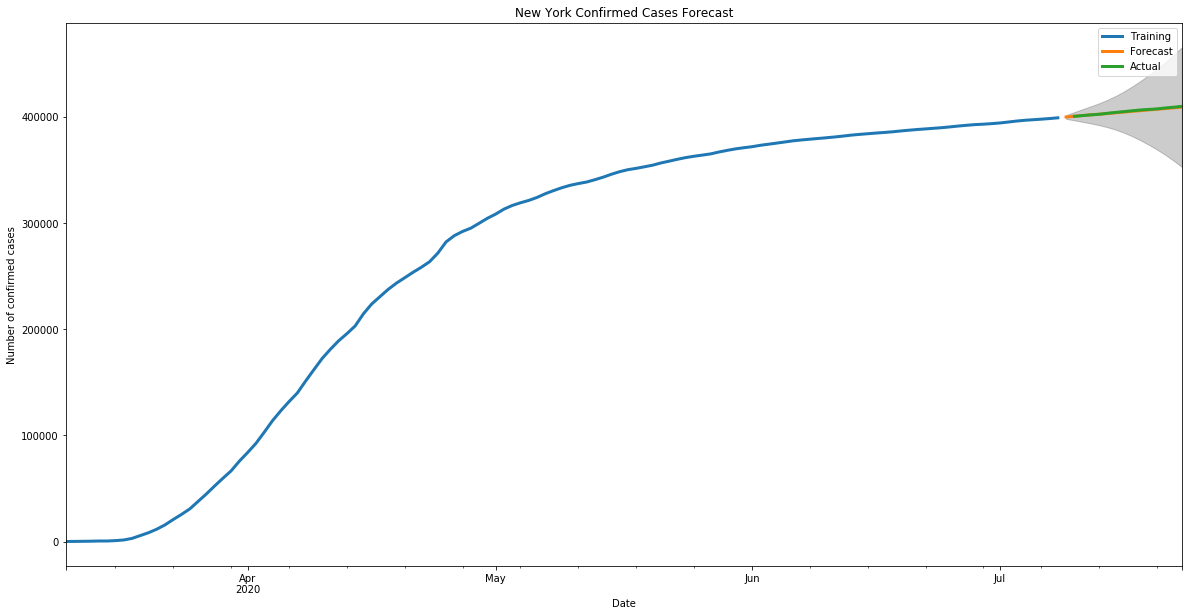

In [51]:

pred = res.get_prediction(start=pd.to_datetime('2020-07-09'),end=pd.to_datetime('2020-07-23'), dynamic=False)
pred_ci = pred.conf_int()
ax = actual_training.plot(label='Training',linewidth=3)
pred.predicted_mean.plot(ax=ax, label='Forecast', alpha=1, figsize=(20, 10),linewidth=3)
actual_testing.plot(ax=ax, label='Actual', alpha=1, figsize=(20, 10),linewidth=3)
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)
ax.set_xlabel('Date')
ax.set_ylabel('Number of confirmed cases')
ax.set_title('New York Confirmed Cases Forecast')
# plt.savefig('New_York_Confirmed_Cases_Forecast.png')

plt.legend()
plt.show()

### Florida

In [52]:
#Three differences
test_dates = '2020-07-10'
training_dates_start = '2020-03-10'
training_dates_end = '2020-07-08'
actual_training = confirmed_concat['Florida'][training_dates_start:training_dates_end]
actual_testing = confirmed_concat['Florida'][test_dates:]
#Fitting Sarimax model
mod = sm.tsa.statespace.SARIMAX(endog = actual_training, order=(6,3,1))
res = mod.fit(disp=False)
print(res.summary())

/Users/jdanielkim123/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/statespace/sarimax.py:963: UserWarning:

Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.



                               SARIMAX Results                                
Dep. Variable:                Florida   No. Observations:                  121
Model:               SARIMAX(6, 3, 1)   Log Likelihood                -938.509
Date:                Thu, 30 Jul 2020   AIC                           1893.018
Time:                        15:26:00   BIC                           1915.184
Sample:                    03-10-2020   HQIC                          1902.018
                         - 07-08-2020                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.6220      0.118     -5.277      0.000      -0.853      -0.391
ar.L2         -0.6102      0.117     -5.197      0.000      -0.840      -0.380
ar.L3         -0.7395      0.120     -6.170      0.0

/Users/jdanielkim123/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/base/model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



In [53]:
pred_confirmed = res.predict()
np.sqrt(metrics.mean_squared_error(actual_training, pred_confirmed))

665.1503396816885

In [54]:
predict_start_date = testing_set.index[0]
predict_end_date = testing_set.index[-1]
predict__confirmed_testing = res.predict(start=predict_start_date, end=predict_end_date)
np.sqrt(metrics.mean_squared_error(actual_testing, predict__confirmed_testing))

10562.21777537951

In [55]:
mean_aboslute_error(actual_testing, predict__confirmed_testing)

7876.2085043310135

In [56]:
mean_squared_error(actual_testing, predict__confirmed_testing)

111560444.33454286

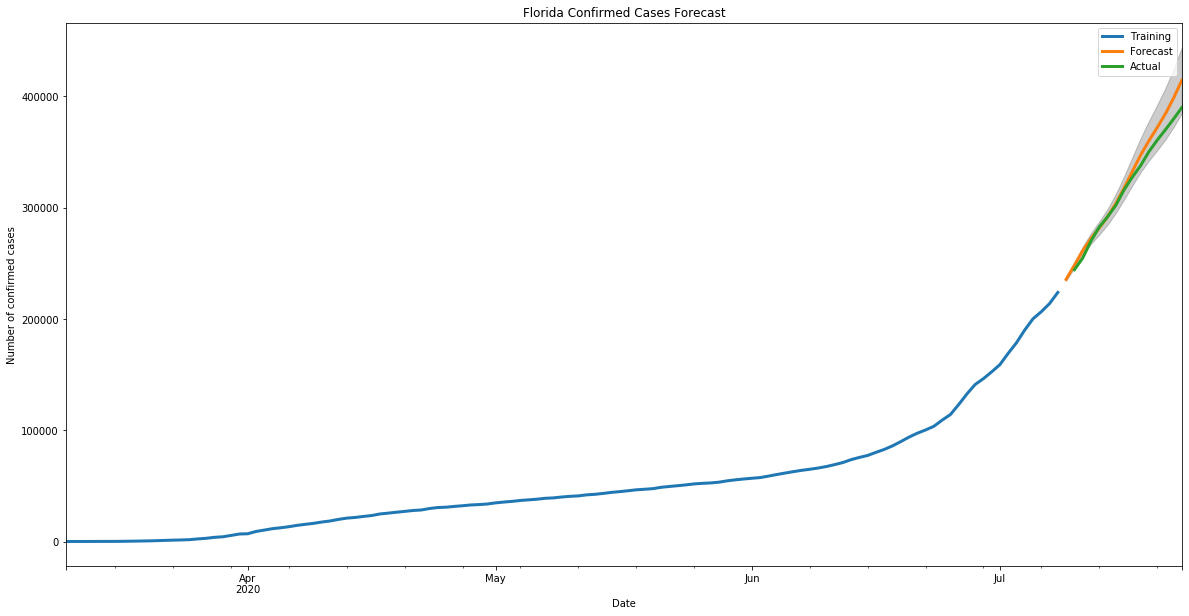

In [57]:

pred = res.get_prediction(start=pd.to_datetime('2020-07-09'),end=pd.to_datetime('2020-07-23'), dynamic=False)
pred_ci = pred.conf_int()
ax = actual_training.plot(label='Training',linewidth=3)
pred.predicted_mean.plot(ax=ax, label='Forecast', alpha=1, figsize=(20, 10),linewidth=3)
actual_testing.plot(ax=ax, label='Actual', alpha=1, figsize=(20, 10),linewidth=3)
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)
ax.set_xlabel('Date')
ax.set_ylabel('Number of confirmed cases')
ax.set_title('Florida Confirmed Cases Forecast')
# plt.savefig('Florida_Confirmed_Cases_Forecast.png')

plt.legend()
plt.show()

### Texas

In [58]:
#Three differences
test_dates = '2020-07-10'
training_dates_start = '2020-03-10'
training_dates_end = '2020-07-08'
actual_training = confirmed_concat['Texas'][training_dates_start:training_dates_end]
actual_testing = confirmed_concat['Texas'][test_dates:]
#Fitting Sarimax model
mod = sm.tsa.statespace.SARIMAX(endog = actual_training, order=(6,3,1))
res = mod.fit(disp=False)
print(res.summary())

/Users/jdanielkim123/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/statespace/sarimax.py:963: UserWarning:

Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.

/Users/jdanielkim123/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/statespace/sarimax.py:975: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.



                               SARIMAX Results                                
Dep. Variable:                  Texas   No. Observations:                  121
Model:               SARIMAX(6, 3, 1)   Log Likelihood                -918.563
Date:                Thu, 30 Jul 2020   AIC                           1853.126
Time:                        15:26:00   BIC                           1875.291
Sample:                    03-10-2020   HQIC                          1862.126
                         - 07-08-2020                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.0010      0.095    -10.493      0.000      -1.188      -0.814
ar.L2         -1.0527      0.125     -8.397      0.000      -1.298      -0.807
ar.L3         -0.8391      0.146     -5.757      0.0

/Users/jdanielkim123/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/base/model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



In [59]:
pred_confirmed = res.predict()
np.sqrt(metrics.mean_squared_error(actual_training, pred_confirmed))

555.8403627345142

In [60]:
predict_start_date = testing_set.index[0]
predict_end_date = testing_set.index[-1]
predict__confirmed_testing = res.predict(start=predict_start_date, end=predict_end_date)
np.sqrt(metrics.mean_squared_error(actual_testing, predict__confirmed_testing))

4612.8062492151485

In [61]:
mean_aboslute_error(actual_testing, predict__confirmed_testing)

3983.0418320334284

In [62]:
mean_squared_error(actual_testing, predict__confirmed_testing)

21277981.492798325

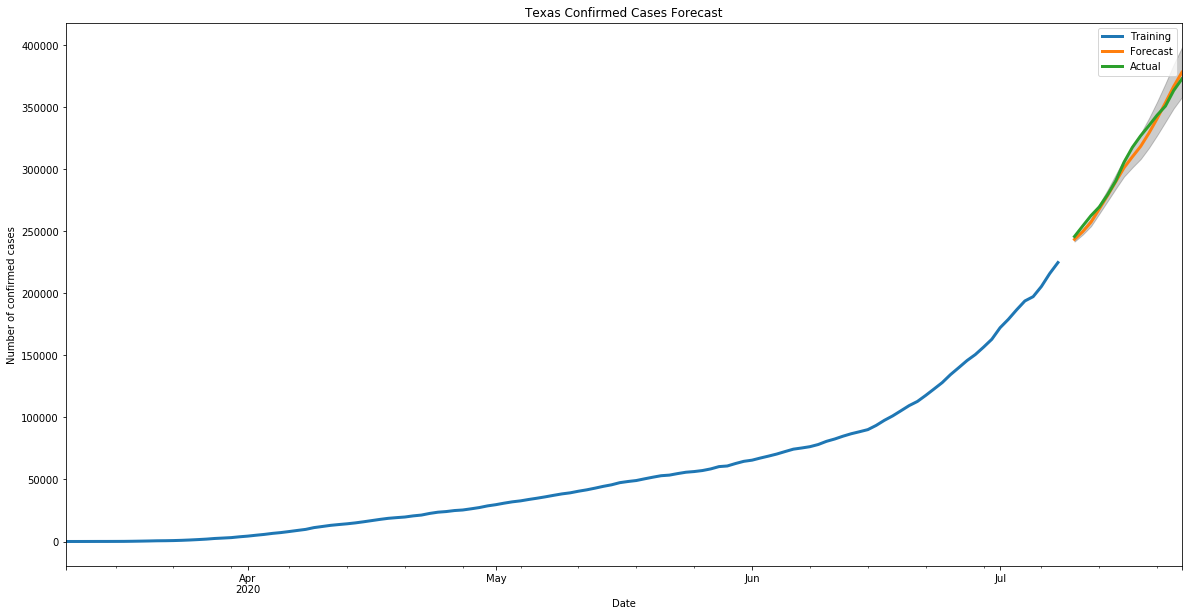

In [63]:

pred = res.get_prediction(start=pd.to_datetime('2020-07-10'),end=pd.to_datetime('2020-07-23'), dynamic=False)
pred_ci = pred.conf_int()
ax = actual_training.plot(label='Training',linewidth=3)
pred.predicted_mean.plot(ax=ax, label='Forecast', alpha=1, figsize=(20, 10),linewidth=3)
actual_testing.plot(ax=ax, label='Actual', alpha=1, figsize=(20, 10),linewidth=3)
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)
ax.set_xlabel('Date')
ax.set_ylabel('Number of confirmed cases')
ax.set_title('Texas Confirmed Cases Forecast')
# plt.savefig('Texas_Confirmed_Cases_Forecast.png')

plt.legend()
plt.show()

We have concluded that the Serimax Model produces the best results

## Cases of Death

In [64]:
#Applying setting_index to every individual state
American_Samoa=setting_index(US_deaths[US_deaths['Province_State']=='American Samoa'])
Guam=setting_index(US_deaths[US_deaths['Province_State']=='Guam'])
Northern_Mariana_Islands=setting_index(US_deaths[US_deaths['Province_State']=='Northern Mariana Islands'])
Puerto_Rico=setting_index(US_deaths[US_deaths['Province_State']=='Puerto Rico'])
Virgin_Islands=setting_index(US_deaths[US_deaths['Province_State']=='Virgin Islands'])
Alabama=setting_index(US_deaths[US_deaths['Province_State']=='Alabama'])
Alaska=setting_index(US_deaths[US_deaths['Province_State']=='Alaska'])
Arizona=setting_index(US_deaths[US_deaths['Province_State']=='Arizona'])
Arkansas=setting_index(US_deaths[US_deaths['Province_State']=='Arkansas'])
California=setting_index(US_deaths[US_deaths['Province_State']=='California'])
Colorado=setting_index(US_deaths[US_deaths['Province_State']=='Colorado'])
Connecticut=setting_index(US_deaths[US_deaths['Province_State']=='Connecticut'])
Delaware=setting_index(US_deaths[US_deaths['Province_State']=='Delaware'])
District_of_Columbia=setting_index(US_deaths[US_deaths['Province_State']=='District of Columbia'])
Florida=setting_index(US_deaths[US_deaths['Province_State']=='Florida'])
Georgia=setting_index(US_deaths[US_deaths['Province_State']=='Georgia'])
Hawaii=setting_index(US_deaths[US_deaths['Province_State']=='Hawaii'])
Idaho=setting_index(US_deaths[US_deaths['Province_State']=='Idaho'])
Illinois=setting_index(US_deaths[US_deaths['Province_State']=='Illinois'])
Indiana=setting_index(US_deaths[US_deaths['Province_State']=='Indiana'])
Iowa=setting_index(US_deaths[US_deaths['Province_State']=='Iowa'])
Kansas=setting_index(US_deaths[US_deaths['Province_State']=='Kansas'])
Kentucky=setting_index(US_deaths[US_deaths['Province_State']=='Kentucky'])
Louisiana=setting_index(US_deaths[US_deaths['Province_State']=='Louisiana'])
Maine=setting_index(US_deaths[US_deaths['Province_State']=='Maine'])
Maryland=setting_index(US_deaths[US_deaths['Province_State']=='Maryland'])
Massachusetts=setting_index(US_deaths[US_deaths['Province_State']=='Massachusetts'])
Michigan=setting_index(US_deaths[US_deaths['Province_State']=='Michigan'])
Minnesota=setting_index(US_deaths[US_deaths['Province_State']=='Minnesota'])
Mississippi=setting_index(US_deaths[US_deaths['Province_State']=='Mississippi'])
Missouri=setting_index(US_deaths[US_deaths['Province_State']=='Missouri'])
Montana=setting_index(US_deaths[US_deaths['Province_State']=='Montana'])
Nebraska=setting_index(US_deaths[US_deaths['Province_State']=='Nebraska'])
Nevada=setting_index(US_deaths[US_deaths['Province_State']=='Nevada'])
New_Hampshire=setting_index(US_deaths[US_deaths['Province_State']=='New Hampshire'])
New_Jersey=setting_index(US_deaths[US_deaths['Province_State']=='New Jersey'])
New_Mexico=setting_index(US_deaths[US_deaths['Province_State']=='New Mexico'])
New_York=setting_index(US_deaths[US_deaths['Province_State']=='New York'])
North_Carolina=setting_index(US_deaths[US_deaths['Province_State']=='North Carolina'])
North_Dakota=setting_index(US_deaths[US_deaths['Province_State']=='North Dakota'])
Ohio=setting_index(US_deaths[US_deaths['Province_State']=='Ohio'])
Oklahoma=setting_index(US_deaths[US_deaths['Province_State']=='Oklahoma'])
Oregon=setting_index(US_deaths[US_deaths['Province_State']=='Oregon'])
Pennsylvania=setting_index(US_deaths[US_deaths['Province_State']=='Pennsylvania'])
Rhode_Island=setting_index(US_deaths[US_deaths['Province_State']=='Rhode Island'])
South_Carolina=setting_index(US_deaths[US_deaths['Province_State']=='South Carolina'])
South_Dakota=setting_index(US_deaths[US_deaths['Province_State']=='South Dakota'])
Tennessee=setting_index(US_deaths[US_deaths['Province_State']=='Tennessee'])
Texas=setting_index(US_deaths[US_deaths['Province_State']=='Texas'])
Utah=setting_index(US_deaths[US_deaths['Province_State']=='Utah'])
Vermont=setting_index(US_deaths[US_deaths['Province_State']=='Vermont'])
Virginia=setting_index(US_deaths[US_deaths['Province_State']=='Virginia'])
Washington=setting_index(US_deaths[US_deaths['Province_State']=='Washington'])
West_Virginia=setting_index(US_deaths[US_deaths['Province_State']=='West Virginia'])
Wisconsin=setting_index(US_deaths[US_deaths['Province_State']=='Wisconsin'])
Wyoming=setting_index(US_deaths[US_deaths['Province_State']=='Wyoming'])
Diamond_Princess=setting_index(US_deaths[US_deaths['Province_State']=='Diamond Princess'])
Grand_Princess=setting_index(US_deaths[US_deaths['Province_State']=='Grand Princess'])

/Users/jdanielkim123/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/pandas/core/frame.py:4102: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [65]:
American_Samoa.rename(columns={'value':US_deaths_states_string[0]},inplace=True)
Guam.rename(columns={'value':US_deaths_states_string[1]},inplace=True)
Northern_Mariana_Islands.rename(columns={'value':US_deaths_states_string[2]},inplace=True)
Puerto_Rico.rename(columns={'value':US_deaths_states_string[3]},inplace=True)
Virgin_Islands.rename(columns={'value':US_deaths_states_string[4]},inplace=True)
Alabama.rename(columns={'value':US_deaths_states_string[5]},inplace=True)
Alaska.rename(columns={'value':US_deaths_states_string[6]},inplace=True)
Arizona.rename(columns={'value':US_deaths_states_string[7]},inplace=True)
Arkansas.rename(columns={'value':US_deaths_states_string[8]},inplace=True)
California.rename(columns={'value':US_deaths_states_string[9]},inplace=True)
Colorado.rename(columns={'value':US_deaths_states_string[10]},inplace=True)
Connecticut.rename(columns={'value':US_deaths_states_string[11]},inplace=True)
Delaware.rename(columns={'value':US_deaths_states_string[12]},inplace=True)
District_of_Columbia.rename(columns={'value':US_deaths_states_string[13]},inplace=True)
Florida.rename(columns={'value':US_deaths_states_string[14]},inplace=True)
Georgia.rename(columns={'value':US_deaths_states_string[15]},inplace=True)
Hawaii.rename(columns={'value':US_deaths_states_string[16]},inplace=True)
Idaho.rename(columns={'value':US_deaths_states_string[17]},inplace=True)
Illinois.rename(columns={'value':US_deaths_states_string[18]},inplace=True)
Indiana.rename(columns={'value':US_deaths_states_string[19]},inplace=True)
Iowa.rename(columns={'value':US_deaths_states_string[20]},inplace=True)
Kansas.rename(columns={'value':US_deaths_states_string[21]},inplace=True)
Kentucky.rename(columns={'value':US_deaths_states_string[22]},inplace=True)
Louisiana.rename(columns={'value':US_deaths_states_string[23]},inplace=True)
Maine.rename(columns={'value':US_deaths_states_string[24]},inplace=True)
Maryland.rename(columns={'value':US_deaths_states_string[25]},inplace=True)
Massachusetts.rename(columns={'value':US_deaths_states_string[26]},inplace=True)
Michigan.rename(columns={'value':US_deaths_states_string[27]},inplace=True)
Minnesota.rename(columns={'value':US_deaths_states_string[28]},inplace=True)
Mississippi.rename(columns={'value':US_deaths_states_string[29]},inplace=True)
Missouri.rename(columns={'value':US_deaths_states_string[30]},inplace=True)
Montana.rename(columns={'value':US_deaths_states_string[31]},inplace=True)
Nebraska.rename(columns={'value':US_deaths_states_string[32]},inplace=True)
Nevada.rename(columns={'value':US_deaths_states_string[33]},inplace=True)
New_Hampshire.rename(columns={'value':US_deaths_states_string[34]},inplace=True)
New_Jersey.rename(columns={'value':US_deaths_states_string[35]},inplace=True)
New_Mexico.rename(columns={'value':US_deaths_states_string[36]},inplace=True)
New_York.rename(columns={'value':US_deaths_states_string[37]},inplace=True)
North_Carolina.rename(columns={'value':US_deaths_states_string[38]},inplace=True)
North_Dakota.rename(columns={'value':US_deaths_states_string[39]},inplace=True)
Ohio.rename(columns={'value':US_deaths_states_string[40]},inplace=True)
Oklahoma.rename(columns={'value':US_deaths_states_string[41]},inplace=True)
Oregon.rename(columns={'value':US_deaths_states_string[42]},inplace=True)
Pennsylvania.rename(columns={'value':US_deaths_states_string[43]},inplace=True)
Rhode_Island.rename(columns={'value':US_deaths_states_string[44]},inplace=True)
South_Carolina.rename(columns={'value':US_deaths_states_string[45]},inplace=True)
South_Dakota.rename(columns={'value':US_deaths_states_string[46]},inplace=True)
Tennessee.rename(columns={'value':US_deaths_states_string[47]},inplace=True)
Texas.rename(columns={'value':US_deaths_states_string[48]},inplace=True)
Utah.rename(columns={'value':US_deaths_states_string[49]},inplace=True)
Vermont.rename(columns={'value':US_deaths_states_string[50]},inplace=True)
Virginia.rename(columns={'value':US_deaths_states_string[51]},inplace=True)
Washington.rename(columns={'value':US_deaths_states_string[52]},inplace=True)
West_Virginia.rename(columns={'value':US_deaths_states_string[53]},inplace=True)
Wisconsin.rename(columns={'value':US_deaths_states_string[54]},inplace=True)
Wyoming.rename(columns={'value':US_deaths_states_string[55]},inplace=True)
Diamond_Princess.rename(columns={'value':US_deaths_states_string[56]},inplace=True)
Grand_Princess.rename(columns={'value':US_deaths_states_string[57]},inplace=True)

In [66]:
#Concat to show general distributions 
deaths_concat = pd.concat([American_Samoa, Guam, Northern_Mariana_Islands,
       Puerto_Rico, Virgin_Islands, Alabama, Alaska, Arizona,
       Arkansas, California, Colorado, Connecticut, Delaware,
       District_of_Columbia, Florida, Georgia, Hawaii, Idaho,
       Illinois, Indiana, Iowa, Kansas, Kentucky, Louisiana,
       Maine, Maryland, Massachusetts, Michigan, Minnesota,
       Mississippi, Missouri, Montana, Nebraska, Nevada,
       New_Hampshire, New_Jersey, New_Mexico, New_York,
       North_Carolina, North_Dakota, Ohio, Oklahoma, Oregon,
       Pennsylvania, Rhode_Island, South_Carolina, South_Dakota,
       Tennessee, Texas, Utah, Vermont, Virginia, Washington,
       West_Virginia, Wisconsin, Wyoming, Diamond_Princess,
       Grand_Princess], axis=1)

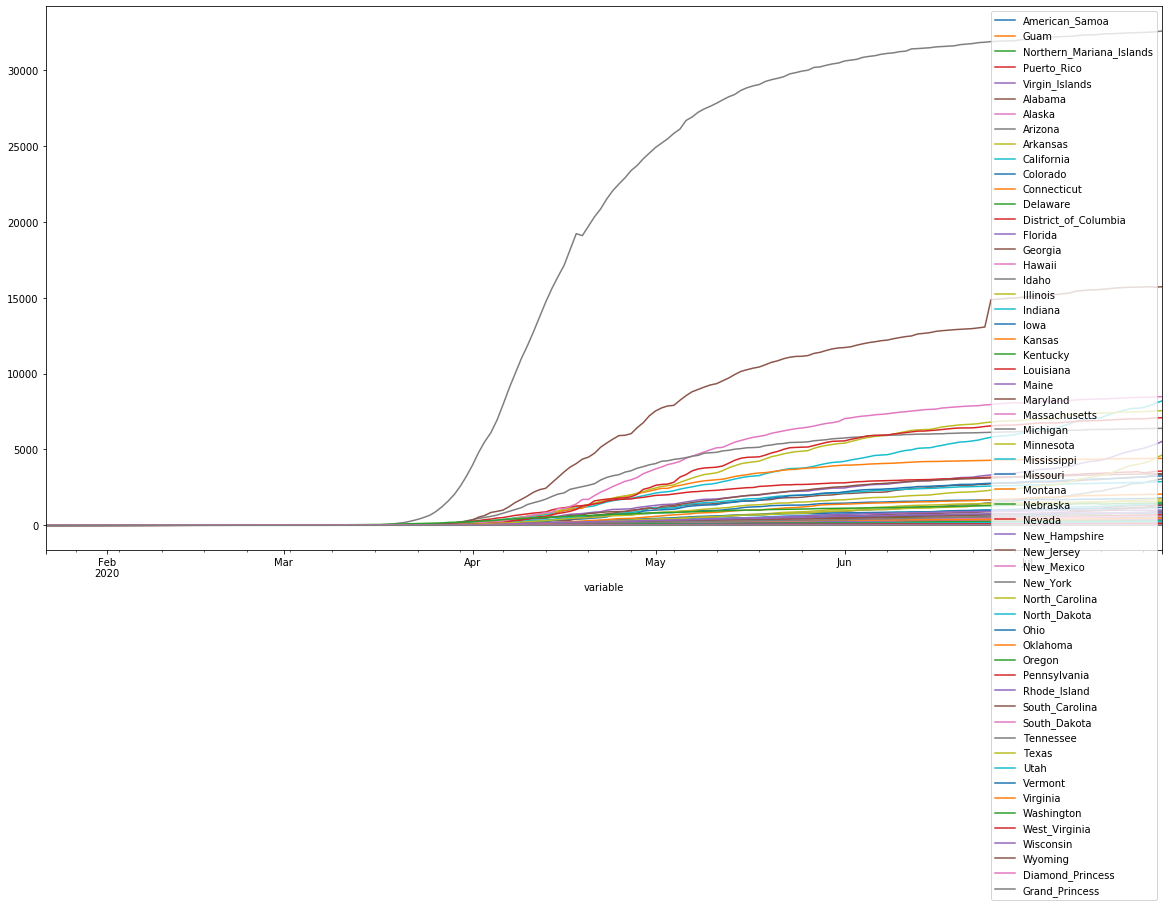

In [67]:
deaths_concat.plot(figsize=(20,10))


## National causes of death

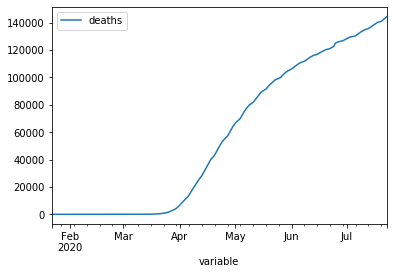

In [68]:
#aggregating to a national leve1
national_deaths =setting_index(cases_deaths)
national_deaths.rename(columns={'value':'deaths'}, inplace=True)
national_deaths.plot()

## Holdout testing deaths


In [69]:
#Total national amount of deaths
death_total = pd.DataFrame(national_deaths)

### Dickey fuller test for stationary

In [70]:
#No difference We fail to reject
from statsmodels.tsa.stattools import adfuller
test = adfuller(death_total.deaths)
dfoutput = pd.Series(test[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
print(dfoutput)

Test Statistic                  -0.252472
p-value                          0.931971
#Lags Used                      11.000000
Number of Observations Used    172.000000
dtype: float64


In [71]:
#1 difference We fail to reject
from statsmodels.tsa.stattools import adfuller
test = adfuller(death_total.deaths.diff()[1:-1])
dfoutput = pd.Series(test[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
print(dfoutput)

Test Statistic                  -1.962807
p-value                          0.303115
#Lags Used                      10.000000
Number of Observations Used    171.000000
dtype: float64


In [72]:
#2 difference We reject
from statsmodels.tsa.stattools import adfuller
test = adfuller(death_total.deaths.diff().diff()[2:-2])
dfoutput = pd.Series(test[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
print(dfoutput)

Test Statistic                  -2.685468
p-value                          0.076587
#Lags Used                       9.000000
Number of Observations Used    170.000000
dtype: float64


Oure rejection region is 0.1 instead. Therefore, we concluded that the data is stationary

In [73]:
#Train test split 
death_total_diff1= death_total['2020-03-08':].diff()
death_total_diff2=death_total_diff1
test_dates = '2020-07-09'
training_dates_start = '2020-03-08'
training_dates_end = '2020-07-08'
testing_set_values = death_total_diff2[test_dates:]
testing_set = death_total_diff2[test_dates:].drop('deaths',axis=1)
training_set = death_total_diff2[training_dates_start:training_dates_end]
actual_training = death_total[training_dates_start:training_dates_end]
actual_testing = death_total[test_dates:]
whole_set = death_total[training_dates_start:]

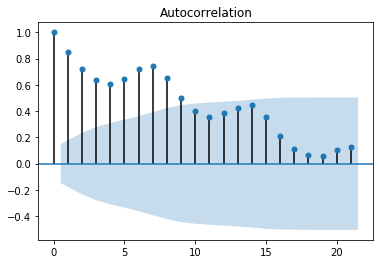

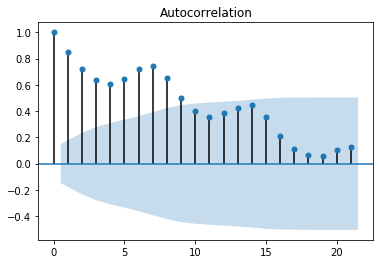

In [74]:

from statsmodels.graphics.tsaplots import plot_acf
plot_acf(training_set[2:], alpha=.1)

In [75]:
#Didn't use this model because couldn't difference more than 2 times
from statsmodels.tsa.arima_model import ARIMA
model = ARIMA(actual_training, order=(3,2,1))
model_fit = model.fit(disp=0)
print(model_fit.summary())

                             ARIMA Model Results                              
Dep. Variable:              D2.deaths   No. Observations:                  121
Model:                 ARIMA(3, 2, 1)   Log Likelihood                -881.741
Method:                       css-mle   S.D. of innovations            352.535
Date:                Thu, 30 Jul 2020   AIC                           1775.481
Time:                        15:26:05   BIC                           1792.256
Sample:                    03-10-2020   HQIC                          1782.294
                         - 07-08-2020                                         
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               5.2734     11.696      0.451      0.652     -17.650      28.197
ar.L1.D2.deaths     0.3541      0.112      3.156      0.002       0.134       0.574
ar.L2.D2.deaths    -0.1682      

In [76]:
pred_deaths = model_fit.predict()

In [77]:
#RMSE Training
np.sqrt(metrics.mean_squared_error(pred_deaths, actual_training[2:]))

83223.6709754656

In [78]:
#Predict Testing
predict=model_fit.predict(start=pred_start_date, end=pred_end_date)

In [79]:
#RMSE Testing
np.sqrt(metrics.mean_squared_error(predict, testing_set_values))

863.8011829714272

## Sarimax Death 

In [80]:
#Train Test Split
death_total_diff1= death_total['2020-03-10':].diff()
death_total_diff2=death_total_diff1.diff()
test_dates = '2020-07-10'
training_dates_start = '2020-03-10'
training_dates_end = '2020-07-09'
testing_set_values = death_total_diff2[test_dates:]
testing_set = death_total_diff2[test_dates:].drop('deaths',axis=1)
training_set = death_total_diff2[training_dates_start:training_dates_end]
actual_training = death_total[training_dates_start:training_dates_end]
actual_testing = death_total[test_dates:]

In [81]:
mod = sm.tsa.statespace.SARIMAX(actual_training['deaths'], order=(5,3,1))
res = mod.fit()
print(res.summary())

                               SARIMAX Results                                
Dep. Variable:                 deaths   No. Observations:                  122
Model:               SARIMAX(5, 3, 1)   Log Likelihood                -860.865
Date:                Thu, 30 Jul 2020   AIC                           1735.730
Time:                        15:26:05   BIC                           1755.184
Sample:                    03-10-2020   HQIC                          1743.630
                         - 07-09-2020                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.4171      0.083     -5.033      0.000      -0.580      -0.255
ar.L2         -0.4217      0.103     -4.080      0.000      -0.624      -0.219
ar.L3         -0.4277      0.114     -3.751      0.0

In [82]:
## Model Evaluation - Training Set
pred_deaths = res.predict()

In [83]:
#Training RMSE
np.sqrt(metrics.mean_squared_error(actual_training,pred_deaths))

324.79210092560817

In [84]:
predict_start_date = testing_set.index[0]
predict_end_date = testing_set.index[-1]

In [85]:
## Model Evaluation - Testing Set
predict__deaths_testing = res.predict(start=predict_start_date, end=predict_end_date)

In [86]:
np.sqrt(metrics.mean_squared_error(actual_testing,predict__deaths_testing))

486.5495260016966

In [87]:
mean_aboslute_error(actual_testing, predict__deaths_testing)

379.39783314074987

In [88]:
mean_squared_error(actual_testing, predict__confirmed_testing)

29598420046.079437

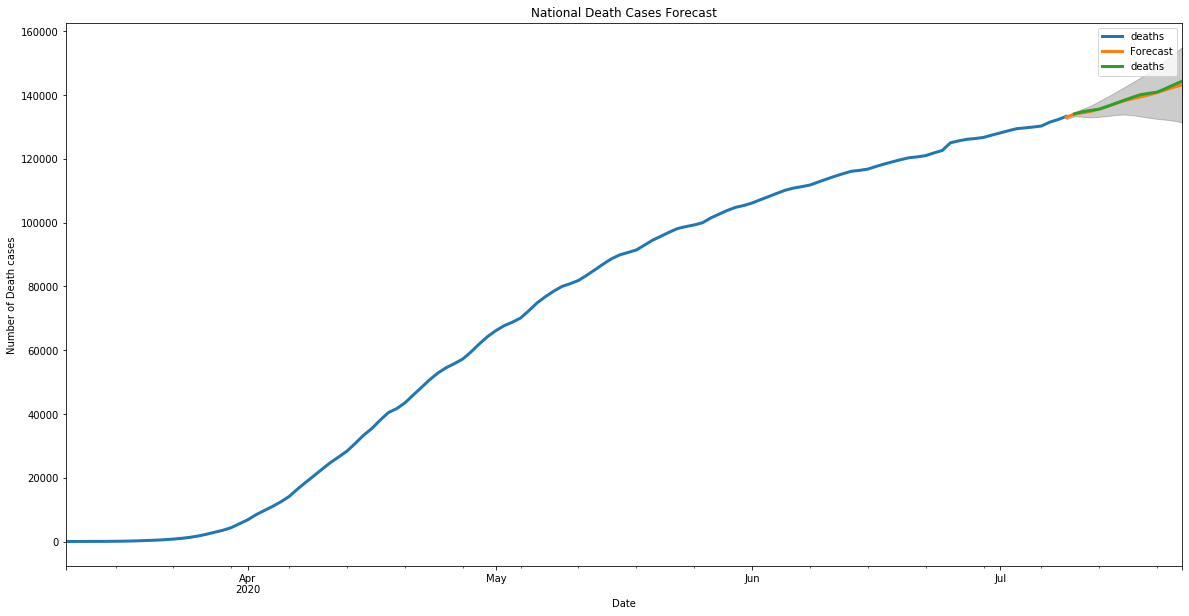

In [89]:

pred = res.get_prediction(start=pd.to_datetime('2020-07-09'),end=pd.to_datetime('2020-07-23'), dynamic=False)
pred_ci = pred.conf_int()
ax = actual_training.plot(label='Training',linewidth=3)
pred.predicted_mean.plot(ax=ax, label='Forecast', alpha=1, figsize=(20, 10),linewidth=3)
actual_testing.plot(ax=ax, label='Actual', alpha=1, figsize=(20, 10),linewidth=3)
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)
ax.set_xlabel('Date')
ax.set_ylabel('Number of Death cases')
ax.set_title('National Death Cases Forecast')
# plt.savefig('National_Death_Cases_Forecast.png')

plt.legend()
plt.show()

In [90]:
death_data = pd.read_csv('Death_time.csv')

In [91]:
death_data['variable'] = pd.to_datetime(death_data['variable'])


In [92]:
death_data.set_index('variable',inplace=True)

# Top 4 States Death

### New York 

In [93]:
test_dates = '2020-07-10'
training_dates_start = '2020-03-10'
training_dates_end = '2020-07-09'
actual_training = death_data['New_York'][training_dates_start:training_dates_end]
actual_testing = death_data['New_York'][test_dates:]
mod = sm.tsa.statespace.SARIMAX(actual_training, order=(5,3,1))
res = mod.fit()
print(res.summary())

                               SARIMAX Results                                
Dep. Variable:               New_York   No. Observations:                  122
Model:               SARIMAX(5, 3, 1)   Log Likelihood                -748.350
Date:                Thu, 30 Jul 2020   AIC                           1510.700
Time:                        15:26:05   BIC                           1530.154
Sample:                    03-10-2020   HQIC                          1518.600
                         - 07-09-2020                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.8452      0.137     -6.168      0.000      -1.114      -0.577
ar.L2         -0.8168      0.190     -4.297      0.000      -1.189      -0.444
ar.L3         -0.5693      0.207     -2.744      0.0

/Users/jdanielkim123/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

/Users/jdanielkim123/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

/Users/jdanielkim123/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/statespace/sarimax.py:963: UserWarning:

Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.

/Users/jdanielkim123/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/statespace/sarimax.py:975: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.



In [94]:
pred_deaths = res.predict()
np.sqrt(metrics.mean_squared_error(actual_training,pred_deaths))

126.68437929168601

In [95]:
predict_start_date = testing_set.index[0]
predict_end_date = testing_set.index[-1]
predict__deaths_testing = res.predict(start=predict_start_date, end=predict_end_date)
np.sqrt(metrics.mean_squared_error(actual_testing,predict__deaths_testing))

108.30389366095014

In [96]:
mean_aboslute_error(actual_testing, predict__deaths_testing)

91.28747854275232

In [97]:
mean_squared_error(actual_testing, predict__deaths_testing)

11729.733382122397

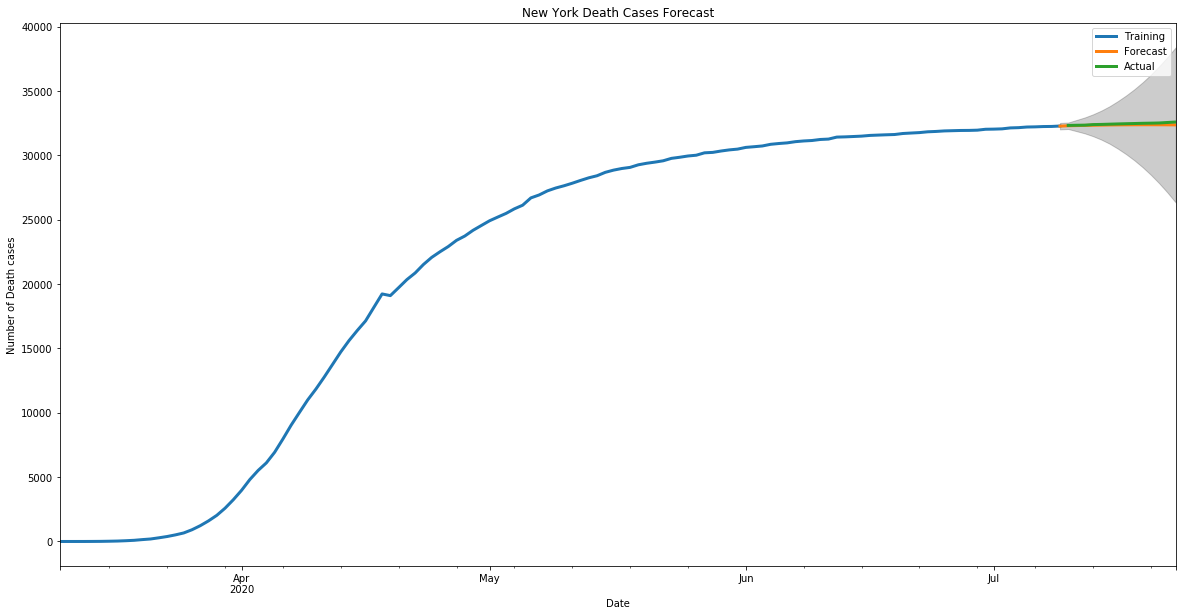

In [98]:
pred = res.get_prediction(start=pd.to_datetime('2020-07-09'),end=pd.to_datetime('2020-07-23'), dynamic=False)
pred_ci = pred.conf_int()
ax = actual_training.plot(label='Training',linewidth=3)
pred.predicted_mean.plot(ax=ax, label='Forecast', alpha=1, figsize=(20, 10),linewidth=3)
actual_testing.plot(ax=ax, label='Actual', alpha=1, figsize=(20, 10),linewidth=3)

ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)
ax.set_xlabel('Date')
ax.set_ylabel('Number of Death cases')
ax.set_title('New York Death Cases Forecast')
# plt.savefig('New_York_Death_Cases_Forecast.png')

plt.legend()
plt.show()

### New Jersey

In [99]:
test_dates = '2020-07-10'
training_dates_start = '2020-03-10'
training_dates_end = '2020-07-09'
actual_training = death_data['New_Jersey'][training_dates_start:training_dates_end]
actual_testing = death_data['New_Jersey'][test_dates:]
mod = sm.tsa.statespace.SARIMAX(actual_training, order=(5,3,1))
res = mod.fit()
print(res.summary())

                               SARIMAX Results                                
Dep. Variable:             New_Jersey   No. Observations:                  122
Model:               SARIMAX(5, 3, 1)   Log Likelihood                -795.743
Date:                Thu, 30 Jul 2020   AIC                           1605.486
Time:                        15:26:06   BIC                           1624.940
Sample:                    03-10-2020   HQIC                          1613.386
                         - 07-09-2020                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.7498      0.043    -17.406      0.000      -0.834      -0.665
ar.L2         -0.5703      0.067     -8.538      0.000      -0.701      -0.439
ar.L3         -0.4412      0.085     -5.207      0.0

/Users/jdanielkim123/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

/Users/jdanielkim123/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



In [100]:
pred_deaths = res.predict()
np.sqrt(metrics.mean_squared_error(actual_training,pred_deaths))

186.64837787980758

In [101]:
predict_start_date = testing_set.index[0]
predict_end_date = testing_set.index[-1]
predict__deaths_testing = res.predict(start=predict_start_date, end=predict_end_date)
np.sqrt(metrics.mean_squared_error(actual_testing,predict__deaths_testing))

340.03167871574914

In [102]:
mean_aboslute_error(actual_testing, predict__deaths_testing)

281.6099073954093

In [103]:
mean_squared_error(actual_testing, predict__deaths_testing)

115621.54253025043

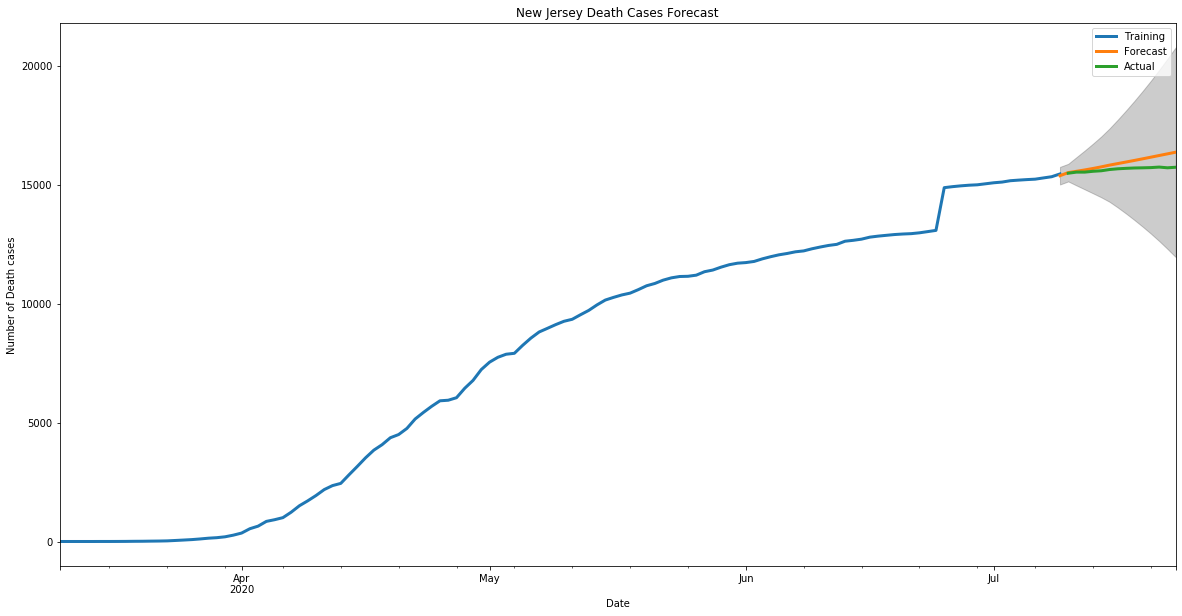

In [104]:
pred = res.get_prediction(start=pd.to_datetime('2020-07-09'),end=pd.to_datetime('2020-07-23'), dynamic=False)
pred_ci = pred.conf_int()
ax = actual_training.plot(label='Training',linewidth=3)
pred.predicted_mean.plot(ax=ax, label='Forecast', alpha=1, figsize=(20, 10),linewidth=3)
actual_testing.plot(ax=ax, label='Actual', alpha=1, figsize=(20, 10),linewidth=3)
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)
ax.set_xlabel('Date')
ax.set_ylabel('Number of Death cases')
ax.set_title('New Jersey Death Cases Forecast')
# plt.savefig('New_Jersey_Death_Cases_Forecast.png')

plt.legend()
plt.show()

### Massachusetts

In [105]:
test_dates = '2020-07-10'
training_dates_start = '2020-03-10'
training_dates_end = '2020-07-09'
actual_training = death_data['Massachusetts'][training_dates_start:training_dates_end]
actual_testing = death_data['Massachusetts'][test_dates:]
mod = sm.tsa.statespace.SARIMAX(actual_training, order=(5,3,1))
res = mod.fit()
print(res.summary())

                               SARIMAX Results                                
Dep. Variable:          Massachusetts   No. Observations:                  122
Model:               SARIMAX(5, 3, 1)   Log Likelihood                -618.875
Date:                Thu, 30 Jul 2020   AIC                           1251.750
Time:                        15:26:06   BIC                           1271.203
Sample:                    03-10-2020   HQIC                          1259.649
                         - 07-09-2020                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.9987      0.070    -14.272      0.000      -1.136      -0.862
ar.L2         -0.7017      0.112     -6.289      0.000      -0.920      -0.483
ar.L3         -0.3640      0.128     -2.855      0.0

/Users/jdanielkim123/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

/Users/jdanielkim123/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

/Users/jdanielkim123/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/statespace/sarimax.py:975: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.



In [106]:
pred_deaths = res.predict()
np.sqrt(metrics.mean_squared_error(actual_training,pred_deaths))

42.34096097767162

In [107]:
predict_start_date = testing_set.index[0]
predict_end_date = testing_set.index[-1]
predict__deaths_testing = res.predict(start=predict_start_date, end=predict_end_date)
np.sqrt(metrics.mean_squared_error(actual_testing,predict__deaths_testing))

74.29188354678432

In [108]:
mean_aboslute_error(actual_testing, predict__deaths_testing)

62.09654015013179

In [109]:
mean_squared_error(actual_testing, predict__deaths_testing)

5519.283960928963

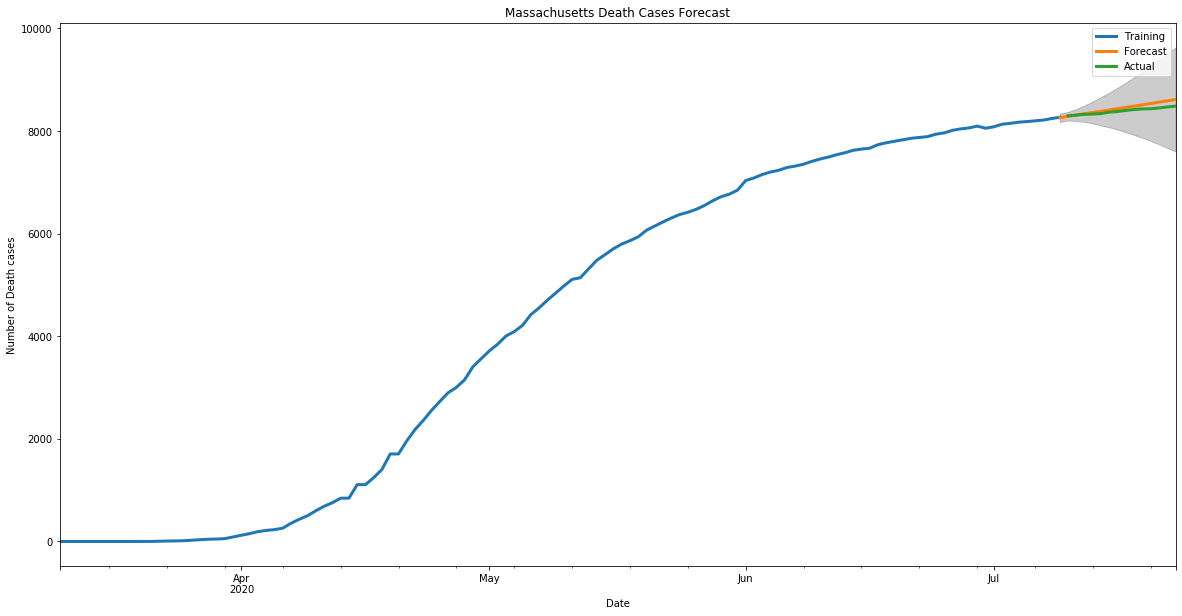

In [110]:
pred = res.get_prediction(start=pd.to_datetime('2020-07-09'),end=pd.to_datetime('2020-07-23'), dynamic=False)
pred_ci = pred.conf_int()
ax = actual_training.plot(label='Training',linewidth=3)
pred.predicted_mean.plot(ax=ax, label='Forecast', alpha=1, figsize=(20, 10),linewidth=3)
actual_testing.plot(ax=ax, label='Actual', alpha=1, figsize=(20, 10),linewidth=3)
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)
ax.set_xlabel('Date')
ax.set_ylabel('Number of Death cases')
ax.set_title('Massachusetts Death Cases Forecast')
# plt.savefig('Massachusetts_Death_Cases_Forecast.png')

plt.legend()
plt.show()

### California

In [111]:
test_dates = '2020-07-10'
training_dates_start = '2020-03-10'
training_dates_end = '2020-07-09'
actual_training = death_data['California'][training_dates_start:training_dates_end]
actual_testing = death_data['California'][test_dates:]
mod = sm.tsa.statespace.SARIMAX(actual_training, order=(5,3,1))
res = mod.fit()
print(res.summary())

                               SARIMAX Results                                
Dep. Variable:             California   No. Observations:                  122
Model:               SARIMAX(5, 3, 1)   Log Likelihood                -544.610
Date:                Thu, 30 Jul 2020   AIC                           1103.221
Time:                        15:26:07   BIC                           1122.674
Sample:                    03-10-2020   HQIC                          1111.120
                         - 07-09-2020                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.3630      0.075     -4.830      0.000      -0.510      -0.216
ar.L2         -0.4888      0.079     -6.184      0.000      -0.644      -0.334
ar.L3         -0.4591      0.080     -5.752      0.0

/Users/jdanielkim123/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

/Users/jdanielkim123/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



In [112]:
pred_deaths = res.predict()
np.sqrt(metrics.mean_squared_error(actual_training,pred_deaths))

22.57751329873902

In [113]:
predict_start_date = testing_set.index[0]
predict_end_date = testing_set.index[-1]
predict__deaths_testing = res.predict(start=predict_start_date, end=predict_end_date)
np.sqrt(metrics.mean_squared_error(actual_testing,predict__deaths_testing))

103.28945554294776

In [114]:
mean_aboslute_error(actual_testing, predict__deaths_testing)

86.25024076738757

In [115]:
mean_squared_error(actual_testing, predict__deaths_testing)

10668.711626358581

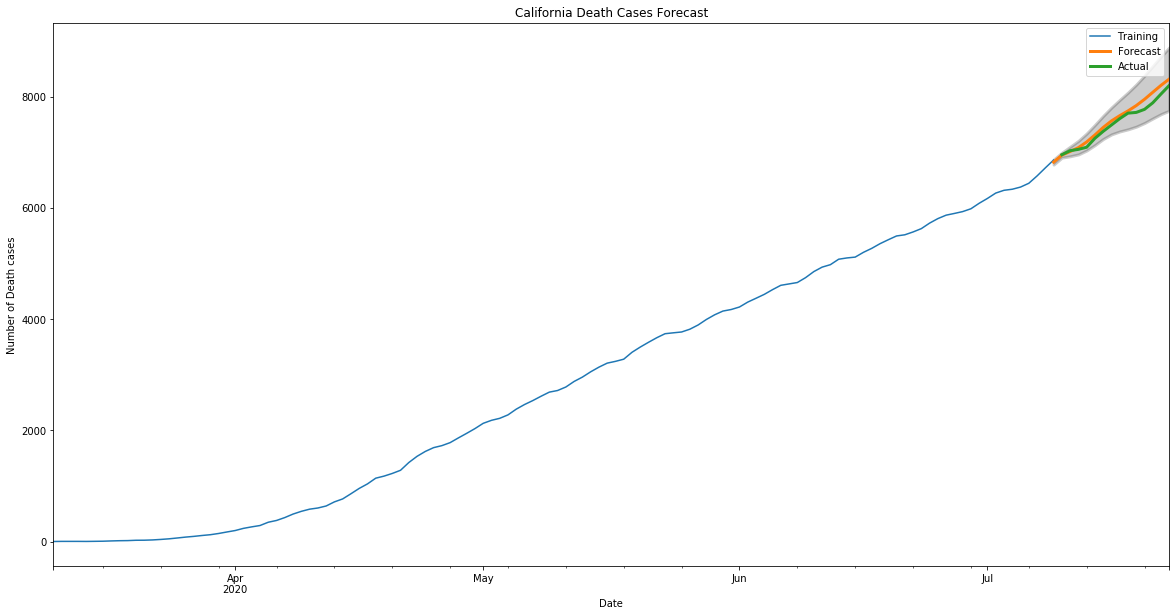

In [116]:
pred = res.get_prediction(start=pd.to_datetime('2020-07-09'),end=pd.to_datetime('2020-07-23'), dynamic=False)
pred_ci = pred.conf_int()
ax = actual_training.plot(label='Training')
pred.predicted_mean.plot(ax=ax, label='Forecast', alpha=1, figsize=(20, 10),linewidth=3)
actual_testing.plot(ax=ax, label='Actual', alpha=1, figsize=(20, 10),linewidth=3)
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2,linewidth=3)
ax.set_xlabel('Date')
ax.set_ylabel('Number of Death cases')
ax.set_title('California Death Cases Forecast')
# plt.savefig('California_Death_Cases_Forecast.png')

plt.legend()
plt.show()

## EDA Top States confirmed and deaths

In [117]:
con=pd.read_csv('time_series_covid19_confirmed_US.csv')

In [118]:
#Configurin Data to help produce visualizations
melt_con = pd.melt(con, id_vars=['UID', 'iso2', 'iso3', 'code3', 'FIPS', 'Admin2', 'Province_State',
       'Country_Region', 'Lat', 'Long_', 'Combined_Key'])
melt_con['variable'] = pd.to_datetime(melt_con['variable'], infer_datetime_format=True)
melt_con=melt_con.rename(columns={'value': 'confirmed'})
melt_con.set_index('variable',inplace=True)
melt_con.loc[melt_con['Province_State'] == 'Guam'].confirmed.sum()
death=pd.read_csv('time_series_covid19_deaths_US.csv')
melt_death = pd.melt(death, id_vars=['UID', 'iso2', 'iso3', 'code3', 'FIPS', 'Admin2', 'Province_State',
       'Country_Region', 'Lat', 'Long_', 'Combined_Key','Population'])
melt_death['variable'] = pd.to_datetime(melt_death['variable'], infer_datetime_format=True)
melt_death=melt_death.rename(columns={'value': 'deaths'})
melt_death.set_index('variable',inplace=True)
melt_con['Population'] = pd.Series(melt_death['Population'])
melt_death['confirmed'] = pd.Series(melt_con['confirmed'])
df_combined = melt_death
co=melt_con.reset_index()
a=co.loc[co.variable=='2020-07-23']
aa=a.groupby('Province_State').confirmed.sum()
af = pd.DataFrame(aa)
de=melt_death.reset_index()
s = de.loc[de.variable == '2020-07-23']
sa= s.groupby('Province_State').deaths.sum()
ab=pd.DataFrame(sa)
df_last=ab.join(af)
df_last.sort_values("confirmed",ascending=False).style.background_gradient(cmap='Blues',subset=["confirmed"]).background_gradient(cmap='Reds',subset=["deaths"])
df_last.sort_values('confirmed',ascending=False)[:10].style.background_gradient(cmap='Blues',subset=["confirmed"])\
                        .background_gradient(cmap='Reds',subset=["deaths"])
merged_inner = pd.merge(left=a,right=s,how='left')

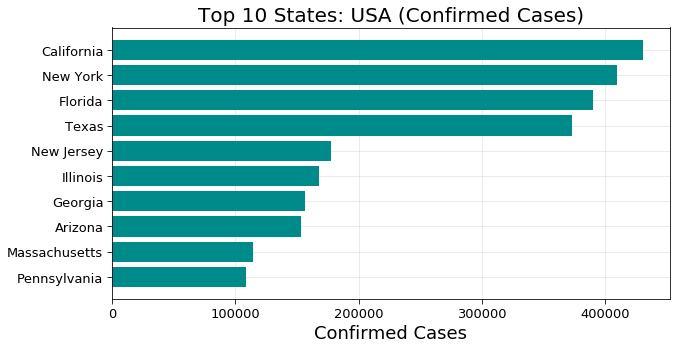

In [119]:
f = plt.figure(figsize=(10,5))
f.add_subplot(111)

plt.axes(axisbelow=True)
plt.barh(df_last.sort_values('confirmed')["confirmed"].index[-10:],df_last.sort_values('confirmed')["confirmed"].values[-10:],color="darkcyan")
plt.tick_params(size=5,labelsize = 13)
plt.xlabel("Confirmed Cases",fontsize=18)
plt.title("Top 10 States: USA (Confirmed Cases)",fontsize=20)
plt.grid(alpha=0.3)
# plt.savefig('Top 10 States: USA (Confirmed Cases).png')


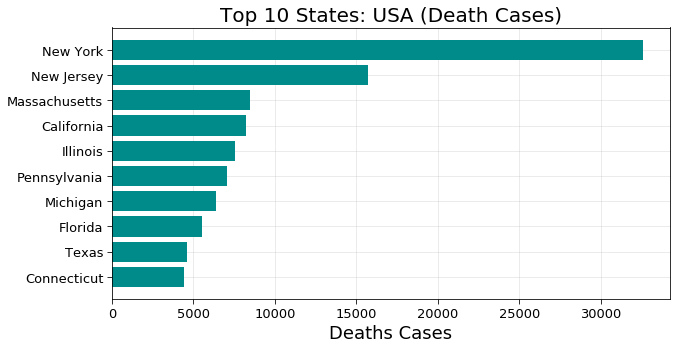

In [120]:
f = plt.figure(figsize=(10,5))
f.add_subplot(111)

plt.axes(axisbelow=True)
plt.barh(df_last.sort_values('deaths')["deaths"].index[-10:],df_last.sort_values('deaths')["deaths"].values[-10:],color="darkcyan")
plt.tick_params(size=5,labelsize = 13)
plt.xlabel("Deaths Cases",fontsize=18)
plt.title("Top 10 States: USA (Death Cases)",fontsize=20)
# plt.savefig('Top 10 States: USA (Death Cases).png')
plt.grid(alpha=0.3)

In [121]:
death_total_concat = pd.DataFrame(death_data.sum())

In [122]:
confirmed_total_concat = pd.DataFrame(confirmed_concat.sum())

In [123]:
confirmed_total_concat.rename(columns={0:'confirmed'},inplace=True)
death_total_concat.rename(columns={0:'death'},inplace=True)

In [124]:
concat_confirmed_death = pd.concat([confirmed_total_concat,death_total_concat],axis=1) 

In [125]:
concat_confirmed_death['ratio'] = concat_confirmed_death['death']/concat_confirmed_death['confirmed']

In [126]:
plot_ratios = concat_confirmed_death.sort_values('ratio',ascending=False).head(5)

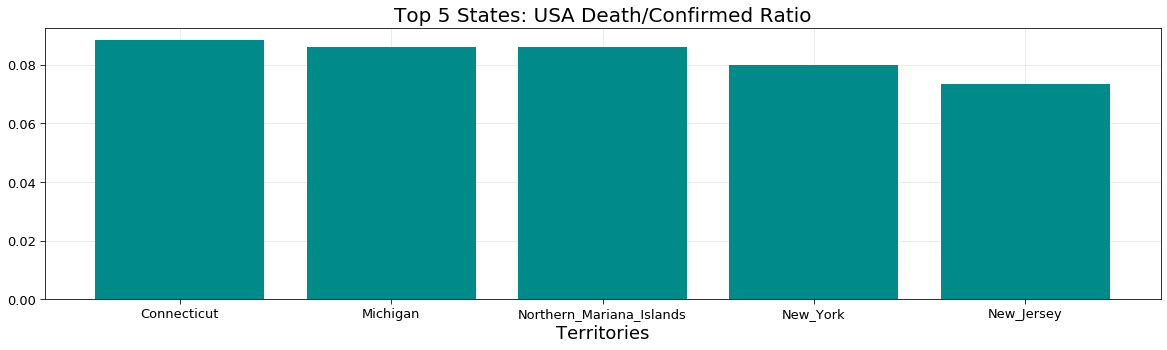

In [127]:
f = plt.figure(figsize=(20,5))
f.add_subplot(111)

plt.axes(axisbelow=True)
plt.bar(['Connecticut','Michigan','Northern_Mariana_Islands','New_York','New_Jersey'],plot_ratios['ratio'],color="darkcyan")
plt.tick_params(size=5,labelsize = 13)
plt.xlabel("Territories",fontsize=18)
plt.title("Top 5 States: USA Death/Confirmed Ratio",fontsize=20)
plt.grid(alpha=0.3)
# plt.savefig('Top 5 States: USA Death to Confirmed Ratio.png')

Here we see that the top 5 terriotories that have the highest death rate from contraction. We recommend to avoid those places

In [128]:
confirmed_concat.to_csv('Confirmed_time.csv')

### PMDarima function: we used stepwise but did not use this model because the rmse is higher

In [129]:
test_dates = '2020-07-10'
training_dates_start = '2020-03-10'
training_dates_end = '2020-07-09'
actual_training = death_total[training_dates_start:training_dates_end]
actual_testing = death_total[test_dates:]

In [130]:
stepwise_fit = pm.auto_arima(actual_training, start_p=1, start_q=1,start_d=3,max_d=3,
                             max_p=3, max_q=3, m=12,
                             start_P=0, seasonal=True,
                             d=1, D=1, trace=True,
                             error_action='ignore',  # don't want to know if an order does not work
                             suppress_warnings=True,  # don't want convergence warnings
                             stepwise=True) 

Performing stepwise search to minimize aic
Fit ARIMA(1,1,1)x(0,1,1,12) [intercept=True]; AIC=1641.984, BIC=1655.441, Time=0.813 seconds
Fit ARIMA(0,1,0)x(0,1,0,12) [intercept=True]; AIC=1759.350, BIC=1764.733, Time=0.019 seconds
Fit ARIMA(1,1,0)x(1,1,0,12) [intercept=True]; AIC=1665.635, BIC=1676.401, Time=0.343 seconds
Fit ARIMA(0,1,1)x(0,1,1,12) [intercept=True]; AIC=1695.919, BIC=1706.685, Time=0.541 seconds
Fit ARIMA(0,1,0)x(0,1,0,12) [intercept=False]; AIC=1758.039, BIC=1760.731, Time=0.033 seconds
Fit ARIMA(1,1,1)x(0,1,0,12) [intercept=True]; AIC=1685.211, BIC=1695.976, Time=0.099 seconds
Fit ARIMA(1,1,1)x(1,1,1,12) [intercept=True]; AIC=1643.885, BIC=1660.033, Time=0.998 seconds
Near non-invertible roots for order (1, 1, 1)(1, 1, 1, 12); setting score to inf (at least one inverse root too close to the border of the unit circle: 0.993)
Fit ARIMA(1,1,1)x(0,1,2,12) [intercept=True]; AIC=1643.975, BIC=1660.123, Time=2.047 seconds
Fit ARIMA(1,1,1)x(1,1,0,12) [intercept=True]; AIC=166

In [131]:
stepwise_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                                    y   No. Observations:                  122
Model:             SARIMAX(1, 1, 2)x(0, 1, [1], 12)   Log Likelihood                -811.794
Date:                              Thu, 30 Jul 2020   AIC                           1635.587
Time:                                      15:26:23   BIC                           1651.735
Sample:                                           0   HQIC                          1642.136
                                              - 122                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0148      0.500      0.030      0.976      -0.964       0.994
ar.L1          0.9999      0.004    228.249      0.000       0.991       1.008
ma.L1         -0.2679      0.070     -3.810      0.000      -0.406      -0.130
ma.L2         -0.3242      0.098     -3.303      0.001      -0.517      -0.132
ma.S.L12      -0.9911      0.103     -9.659      0.000      -1.192      -0.790
sigma2       1.36e+05   1.32e-05   1.03e+10      0.000    1.36e+05    1.36e+05
===================================================================================
Ljung-Box (Q):                      240.16   Jarque-Bera (JB):                53.06
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               1.54   Skew:                             0.15
Prob(H) (two-sided):                  0.20   Kurtosis:                         6.41
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 3.99e+24. Standard errors may be unstable.
"""

## Percent Change: We did not use this model because the RMSE was worse

Test Statistic                  -2.600751
p-value                          0.092842
#Lags Used                      11.000000
Number of Observations Used    124.000000
dtype: float64


/Users/jdanielkim123/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/base/model.py:548: HessianInversionWarning:

Inverting hessian failed, no bse or cov_params available



                              ARMA Model Results                              
Dep. Variable:                 deaths   No. Observations:                  121
Model:                     ARMA(3, 5)   Log Likelihood                 258.441
Method:                       css-mle   S.D. of innovations              0.027
Date:                Thu, 30 Jul 2020   AIC                           -496.882
Time:                        15:26:26   BIC                           -468.924
Sample:                    03-10-2020   HQIC                          -485.527
                         - 07-08-2020                                         
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.1119      0.094      1.194      0.232      -0.072       0.295
ar.L1.deaths     0.4016      0.067      6.004      0.000       0.270       0.533
ar.L2.deaths    -0.3287      0.067     -4.90

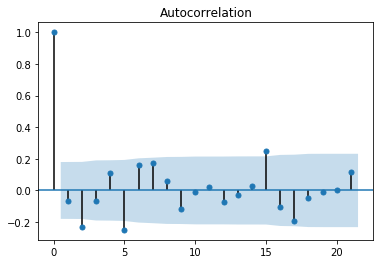

In [132]:
#Changed the data to percent changes
death_total['pct_change'] = death_total['deaths'].pct_change()
death_total.drop('deaths', axis=1, inplace=True)
death_total.rename(columns={'pct_change':'deaths'}, inplace=True)
death_total.rename(columns={'pct_change':'deaths'}, inplace=True)

from statsmodels.tsa.stattools import adfuller
test = adfuller(whole_set.deaths[2:])
dfoutput = pd.Series(test[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
print(dfoutput)

death_total_diff1= death_total['2020-03-10':].diff()
death_total_diff2=death_total_diff1
test_dates = '2020-07-09'
training_dates_start = '2020-03-10'
training_dates_end = '2020-07-08'
testing_set_values = death_total_diff2[test_dates:]
testing_set = death_total_diff2[test_dates:].drop('deaths',axis=1)
training_set = death_total_diff2[training_dates_start:training_dates_end]
actual_training = death_total[training_dates_start:training_dates_end]
actual_testing = death_total[test_dates:]
whole_set = death_total[training_dates_start:]

#Modeling usin Arima
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(training_set[2:], alpha=.05)

from statsmodels.tsa.arima_model import ARIMA
model = ARIMA(actual_training, order=(3,0,5))
model_fit = model.fit(disp=0)
print(model_fit.summary())

pred_deaths = model_fit.predict()

pred_deaths=pd.DataFrame(pred_deaths)

pred_deaths.rename(columns={0:'death_pct'},inplace=True)

predict=model_fit.predict(start=pred_start_date, end=pred_end_date)

#converting from percentage to actual values
def converting_from_precentage(value2,sample_list):
    #value must be the value of one day prior to the sample set
    value=value2
    listing =[]
    for i in sample_list:
        value=(value*(i+1))
        listing.append(value)
    return listing

#Calculating RMSE

def rmse(listing,actual):
    return np.sqrt(metrics.mean_squared_error(listing, actual))


In [133]:
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true))

In [134]:
# Mean absolute percentage error for testing
mean_absolute_percentage_error(actual_testing, predict)

2.669425478250796

In [135]:
#RMSE of training dataset
converting_from_precentage(28,pred_deaths['death_pct'])

rmse(converting_from_precentage(28,pred_deaths['death_pct']),actual_training)


131538.94632323668

In [136]:
# RMSE of Testing set
predict=model_fit.predict(start=pred_start_date, end=pred_end_date)

converting_from_precentage(132300,predict)

rmse(converting_from_precentage(132300,predict),actual_testing)

150290.35365896637

Worse RMSE form original sarimax model

In [137]:
mod = sm.tsa.statespace.SARIMAX(training_set, order=(5,3,1))
res = mod.fit()
print(res.summary())

/Users/jdanielkim123/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/statespace/sarimax.py:975: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.



                               SARIMAX Results                                
Dep. Variable:                 deaths   No. Observations:                  121
Model:               SARIMAX(5, 3, 1)   Log Likelihood                 188.815
Date:                Thu, 30 Jul 2020   AIC                           -363.629
Time:                        15:26:27   BIC                           -344.235
Sample:                    03-10-2020   HQIC                          -355.755
                         - 07-08-2020                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.3139      0.066    -19.810      0.000      -1.444      -1.184
ar.L2         -1.4280      0.109    -13.069      0.000      -1.642      -1.214
ar.L3         -1.0463      0.128     -8.167      0.0

/Users/jdanielkim123/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/base/model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



In [138]:
pred_deaths = res.predict()

pred_deaths=pd.DataFrame(pred_deaths)

pred_deaths.rename(columns={0:'death_pct'},inplace=True)

predict=model_fit.predict(start=pred_start_date, end=pred_end_date)

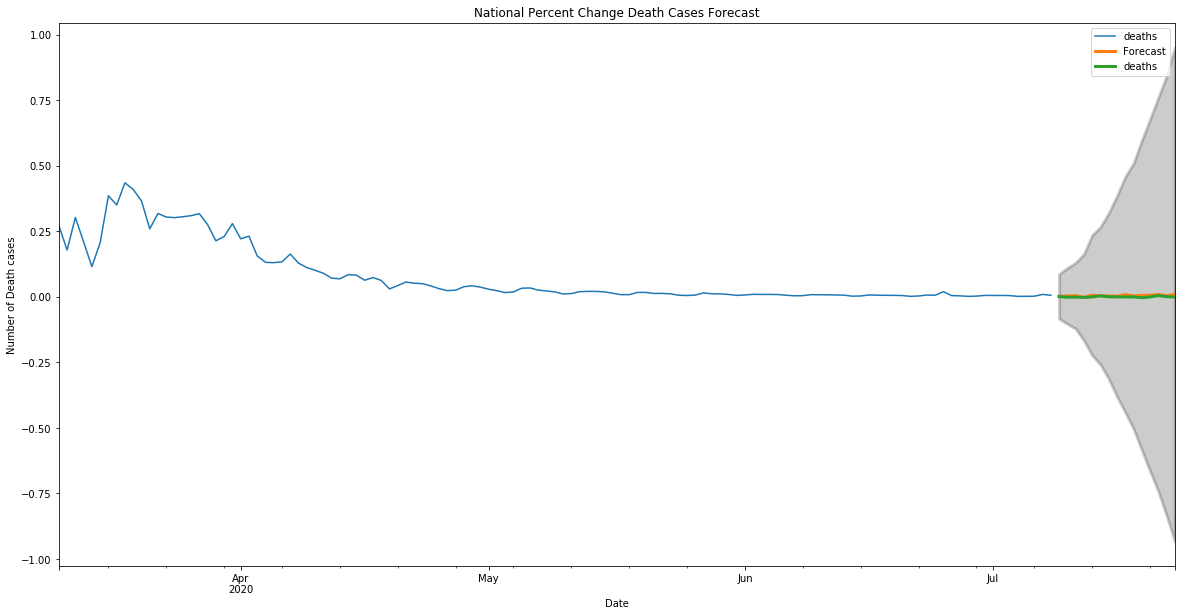

In [139]:
pred = res.get_prediction(start=pd.to_datetime('2020-07-09'),end=pd.to_datetime('2020-07-23'), dynamic=False)
pred_ci = pred.conf_int()
ax = actual_training.plot(label='Training')
pred.predicted_mean.plot(ax=ax, label='Forecast', alpha=1, figsize=(20, 10),linewidth=3)
testing_set_values.plot(ax=ax, label='Actual', alpha=1, figsize=(20, 10),linewidth=3)
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2,linewidth=3)
ax.set_xlabel('Date')
ax.set_ylabel('Number of Death cases')
ax.set_title('National Percent Change Death Cases Forecast')
plt.legend()
plt.show()
# plt.savefig('National Percent Change Death Cases Forecast.png')